In [57]:
import pandas
import psutil as psutil
from scipy.io import arff
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from dl85 import DL85Predictor
from dl85 import DL85Classifier
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import MyCode.utils as utils
import graphviz


In [58]:
pd.set_option('max_columns', None)
FILE_NAME = "lawsuit_k_supp2"

df_pydl = pandas.read_csv("save/"+FILE_NAME+"_relab.csv")
df_sklearn = pandas.read_csv("save/"+FILE_NAME+"_relab_sklearn.csv")

In [59]:
df_pydl

,k,depth,random_state,clf.error_,clf.accuracy_,accuracy_pred,accuracy_test,sum_misclassified_train,discrimination_train,discrimination_train_pred,discrimination_test,sum_discrimination_additive_train,sum_discrimination_additive_train_pred,sum_discrimination_additive_test_pred,sum_discrimination_additive_train_abs,sum_discrimination_additive_train_pred_abs,sum_discrimination_additive_test_pred_abs,duration,min_supp,clf.tree_,accuracy_relab_1,discrimination_relab_1,discrimination_relab_abs_1,discrimination_relab_test_1,discrimination_relab_test_abs_1,accuracy_relab_2,discrimination_relab_2,discrimination_relab_abs_2,discrimination_relab_test_2,discrimination_relab_test_abs_2,accuracy_relab_3,discrimination_relab_3,discrimination_relab_abs_3,discrimination_relab_test_3,discrimination_relab_test_abs_3,accuracy_relab_0.0,discrimination_relab_0.0,discrimination_relab_abs_0.0,discrimination_relab_test_0.0,discrimination_relab_test_abs_0.0,accuracy_relab_0.1,discrimination_relab_0.1,discrimination_relab_abs_0.1,discrimination_relab_test_0.1,discrimination_relab_test_abs_0.1,accuracy_relab_0.2,discrimination_relab_0.2,discrimination_relab_abs_0.2,discrimination_relab_test_0.2,discrimination_relab_test_abs_0.2,accuracy_relab_0.3,discrimination_relab_0.3,discrimination_relab_abs_0.3,discrimination_relab_test_0.3,discrimination_relab_test_abs_0.3
0,0,1,1,51.000000,0.755981,0.755981,0.730769,51,0.325619,0.156476,0.266667,0.156476,0.325619,0.260606,0.156476,0.325619,0.272727,0.067570,2,"{'feat': 10, 'left': {'value': 1, 'error': 0.0...",0.60287,0.00000,0.00000,0.000000,0.000000,0.24401,-0.15648,0.15647,-0.266667,0.266667,0.24401,-0.15648,0.15647,-0.266667,0.266667,0.60287,0.00000,0.00000,0.000000,0.000000,0.60287,0.00000,0.00000,0.000000,0.000000,0.75598,0.15647,0.15647,0.266667,0.266667,0.75598,0.15647,0.15647,0.266667,0.266667
1,0,1,3,48.000000,0.770335,0.770335,0.673077,48,0.304364,0.234535,-0.046083,0.234535,0.304364,0.342550,0.234535,0.304364,0.434716,0.025888,2,"{'feat': 10, 'left': {'value': 1, 'error': 0.0...",0.60765,0.00000,0.00000,0.000000,0.000000,0.22966,-0.23454,0.23453,0.046083,0.046083,0.22966,-0.23454,0.23453,0.046083,0.046083,0.60765,0.00000,0.00000,0.000000,0.000000,0.60765,0.00000,0.00000,0.000000,0.000000,0.60765,0.00000,0.00000,0.000000,0.000000,0.77033,0.23453,0.23453,-0.046083,0.046083
2,0,1,5,49.000000,0.765550,0.765550,0.692308,49,0.324563,0.179566,0.172619,0.179566,0.324563,0.279762,0.179566,0.324563,0.279762,0.053865,2,"{'feat': 10, 'left': {'value': 1, 'error': 0.0...",0.60765,0.00000,0.00000,0.000000,0.000000,0.23444,-0.17957,0.17956,-0.172619,0.172619,0.23444,-0.17957,0.17956,-0.172619,0.172619,0.60765,0.00000,0.00000,0.000000,0.000000,0.60765,0.00000,0.00000,0.000000,0.000000,0.76555,0.17956,0.17956,0.172619,0.172619,0.76555,0.17956,0.17956,0.172619,0.172619
3,0,1,7,51.000000,0.755981,0.755981,0.730769,51,0.290782,0.185791,0.137931,0.185791,0.290782,0.386807,0.185791,0.290782,0.386807,0.028651,2,"{'feat': 10, 'left': {'value': 1, 'error': 0.0...",0.58373,0.00000,0.00000,0.000000,0.000000,0.24401,-0.18580,0.18579,-0.137931,0.137931,0.24401,-0.18580,0.18579,-0.137931,0.137931,0.58373,0.00000,0.00000,0.000000,0.000000,0.58373,0.00000,0.00000,0.000000,0.000000,0.75598,0.18579,0.18579,0.137931,0.137931,0.75598,0.18579,0.18579,0.137931,0.137931
4,0,1,9,54.000000,0.741627,0.741627,0.788462,54,0.316116,0.144628,0.297386,0.144628,0.316116,0.281046,0.144628,0.316116,0.313725,0.015885,2,"{'feat': 10, 'left': {'value': 1, 'error': 0.0...",0.61244,0.00000,0.00000,0.000000,0.000000,0.25837,-0.14463,0.14462,-0.297386,0.297386,0.25837,-0.14463,0.14462,-0.297386,0.297386,0.61244,0.00000,0.00000,0.000000,0.000000,0.61244,0.00000,0.00000,0.000000,0.000000,0.74162,0.14462,0.14462,0.297386,0.297386,0.74162,0.14462,0.14462,0.297386,0.297386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [60]:
df_sklearn

,k,depth,random_state,accuracy_pred,accuracy_test,discrimination_train,discrimination_train_pred,discrimination_test,sum_discrimination_additive_train,sum_discrimination_additive_train_pred,sum_discrimination_additive_test_pred,sum_discrimination_additive_train_abs,sum_discrimination_additive_train_pred_abs,sum_discrimination_additive_test_pred_abs,min_supp,clf.tree_,accuracy_relab_1,discrimination_relab_1,discrimination_relab_abs_1,discrimination_relab_test_1,discrimination_relab_test_abs_1,accuracy_relab_2,discrimination_relab_2,discrimination_relab_abs_2,discrimination_relab_test_2,discrimination_relab_test_abs_2,accuracy_relab_3,discrimination_relab_3,discrimination_relab_abs_3,discrimination_relab_test_3,discrimination_relab_test_abs_3,accuracy_relab_0.0,discrimination_relab_0.0,discrimination_relab_abs_0.0,discrimination_relab_test_0.0,discrimination_relab_test_abs_0.0,accuracy_relab_0.1,discrimination_relab_0.1,discrimination_relab_abs_0.1,discrimination_relab_test_0.1,discrimination_relab_test_abs_0.1,accuracy_relab_0.2,discrimination_relab_0.2,discrimination_relab_abs_0.2,discrimination_relab_test_0.2,discrimination_relab_test_abs_0.2,accuracy_relab_0.3,discrimination_relab_0.3,discrimination_relab_abs_0.3,discrimination_relab_test_0.3,discrimination_relab_test_abs_0.3
0,0,1,1,0.755981,0.730769,0.325619,0.156476,0.266667,0.325619,0.156476,0.266667,0.325619,0.156476,0.266667,2,<sklearn.tree._tree.Tree object at 0x7fe2ca1c9...,0.6028,0.000000,0.000000,0.000000,0.000000,0.2440,-0.156476,0.156476,-0.266667,0.266667,0.2440,-0.156476,0.156476,-0.266667,0.266667,0.6028,0.000000,0.000000,0.000000,0.000000,0.6028,0.000000,0.000000,0.000000,0.000000,0.7559,0.156476,0.156476,0.266667,0.266667,0.7559,0.156476,0.156476,0.266667,0.266667
1,0,2,1,0.851675,0.884615,0.325619,0.230571,0.169697,0.325619,0.230571,0.169697,0.325619,0.230571,0.363636,2,<sklearn.tree._tree.Tree object at 0x7fe2ca1c9...,0.6985,0.074095,0.074095,-0.096970,0.096970,0.6028,0.000000,0.000000,0.000000,0.000000,0.1483,-0.230571,0.230571,-0.169697,0.169697,0.1483,-0.230571,0.230571,-0.169697,0.169697,0.6985,0.074095,0.074095,-0.096970,0.096970,0.6985,0.074095,0.074095,-0.096970,0.096970,0.8516,0.230571,0.230571,0.169697,0.363636
2,0,3,1,0.880383,0.846154,0.325619,0.312952,0.375758,0.325619,0.312952,0.375758,0.325619,0.312952,0.375758,2,<sklearn.tree._tree.Tree object at 0x7fe2ca1c9...,0.8516,0.230571,0.395333,0.169697,0.581818,0.7272,0.074095,0.238857,0.060606,0.472727,0.5741,-0.082381,0.082381,-0.206061,0.206061,0.5741,-0.082381,0.082381,-0.206061,0.206061,0.7272,0.074095,0.238857,0.060606,0.472727,0.7272,0.074095,0.238857,0.060606,0.472727,0.8516,0.230571,0.395333,0.169697,0.581818
3,0,4,1,0.880383,0.826923,0.325619,0.284857,0.354545,0.325619,0.284857,0.354545,0.341238,0.284857,0.354545,2,<sklearn.tree._tree.Tree object at 0x7fe2ca1c9...,0.8708,0.238000,0.331714,0.148485,0.560606,0.8516,0.202476,0.367238,0.148485,0.560606,0.6937,0.000857,0.568857,-0.251515,0.960606,0.5693,-0.127524,0.440476,-0.339394,0.872727,0.6937,0.000857,0.568857,-0.251515,0.960606,0.6937,0.000857,0.568857,-0.251515,0.960606,0.8803,0.284857,0.284857,0.354545,0.354545
4,0,5,1,0.909091,0.884615,0.325619,0.270000,0.248485,0.325619,0.270000,0.248485,0.388857,0.363714,0.569697,2,<sklearn.tree._tree.Tree object at 0x7fe2ca1c9...,0.9043,0.246000,0.339714,0.227273,0.548485,0.8803,0.202476,0.383238,0.227273,0.548485,0.8755,0.194476,0.375238,0.227273,0.548485,0.6363,-0.100190,0.413143,-0.293939,0.893939,0.7751,0.044000,0.525714,-0.160606,0.936364,0.8755,0.194476,0.375238,0.227273,0.548485,0.9090,0.270000,0.363714,0.248485,0.569697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,3,99,0.870813,0.884615,0.360373,0.345770,0.221691,0.360373,0.345770,0.221691,0.373752,0.345770,0.221691,2,<sklearn.tree._tree.Tree object at 0x7fe2c9d79...,0.7272,0

In [61]:
_COLORS4 = ['#ff0000', '#00ff00', '#0000ff', '#87cefa']
_COLORS5 = ['#008080', '#ffa500', '#00ff00', '#0000ff', '#ff1493']
_COLORS7 = ['#2e8b57', '#ff0000', '#ffd700', '#c71585', '#00ff00', '#0000ff', '#1e90ff']
_COLORS10 = ['#006400', '#00008b', '#b03060', '#ff4500', '#ffd700', '#7cfc00', '#00ffff', '#ff00ff', '#6495ed',
          '#ffdab9']
_COLORS11 = ['#8b4513', '#006400', '#4682b4', '#4b0082', '#ff0000', '#00ff7f', '#00ffff', '#0000ff', '#ffff54',
             '#ff1493', '#ffe4c4']

In [62]:
def graphh(axe1, axe2, size):
    colors11 = _COLORS11.copy()
    colors5 = _COLORS5.copy()
    colors4 = _COLORS4.copy()
    legends = ['relab discrim < 0', 'relab discrim < 0.1', 'relab discrim < 0.2', 'relab discrim < 0.3', 'no relab']
    fig, axes = plt.subplots()
    for depth in df_sklearn['depth'].unique():
        index_legends = 0
        y_values = list()
        x_values = list()
        y_values_pydl = list()
        x_values_pydl = list()
        for x_axe, y_axe in axe1:

            tmp = df_sklearn.loc[(df_sklearn["k"] == 0) & (df_sklearn["depth"] == depth)]
            x_values.append(tmp[x_axe].mean())
            y_values.append(tmp[y_axe].mean())

            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=colors5[index_legends])

            tmp = df_pydl.loc[(df_pydl["k"] == 0) & (df_pydl["depth"] == depth)]
            x_values_pydl.append(tmp[x_axe].mean())
            y_values_pydl.append(tmp[y_axe].mean())

            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=colors5[index_legends])


            index_legends +=1
        plt.plot(x_values, y_values, label="Sklearn", c=colors4[0])
        plt.plot(x_values_pydl, y_values_pydl, label="Pydl", c=colors4[1])

        y_values = list()
        x_values = list()
        x_axe = axe2[0]
        y_axe = axe2[1]
        index_legends = 0
        for k in [0, 1, 5, 10, 50, 100, 250, 500, 1000, 5000, 100000]:

            tmp = df_pydl.loc[(df_pydl["k"] == k) & (df_pydl["depth"] == depth)]
            x_values.append(tmp[x_axe].mean())
            y_values.append(tmp[y_axe].mean())

            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=colors11[index_legends])
            index_legends +=1

        plt.plot(x_values, y_values, label="Pydl (constantes)", c=colors4[2])


        plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
        plt.title(f'Depth {depth}')
        plt.ylabel('discrimination')
        plt.xlabel('accuracy')
        plt.ylim(size[0], size[1])
        plt.xlim(0, 1)
        plt.legend()

        plt.show()

# Train

## Train. Threshold

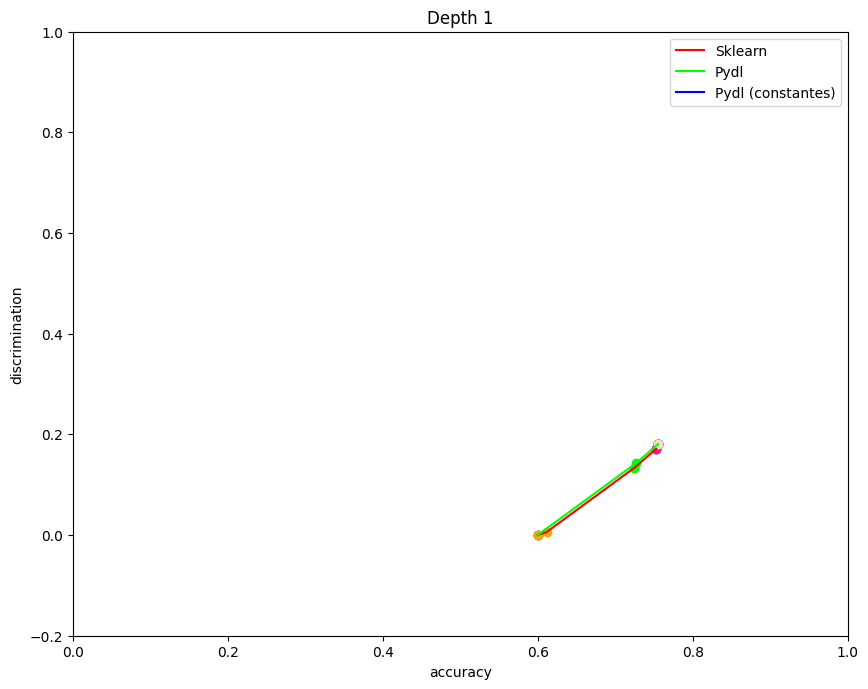

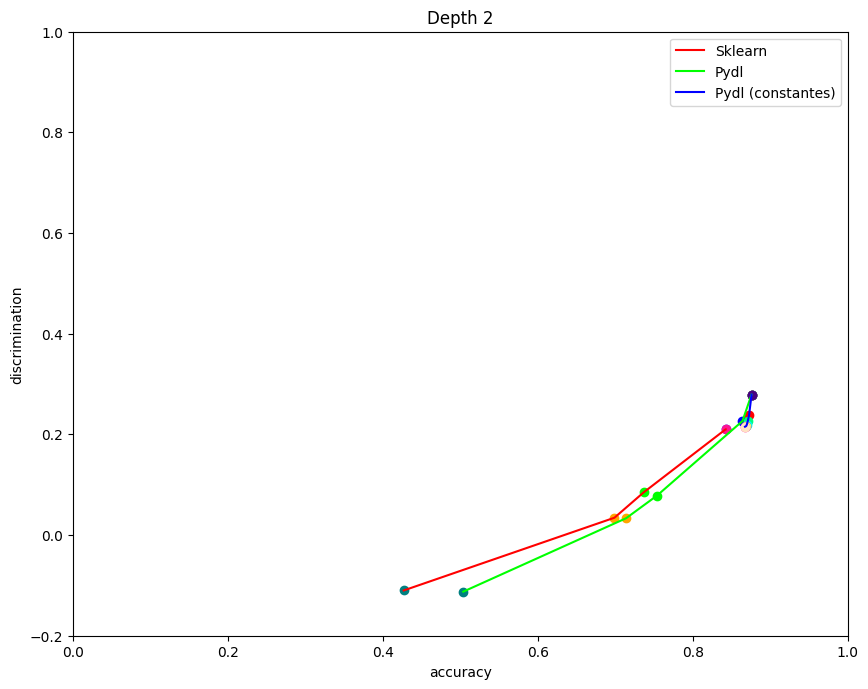

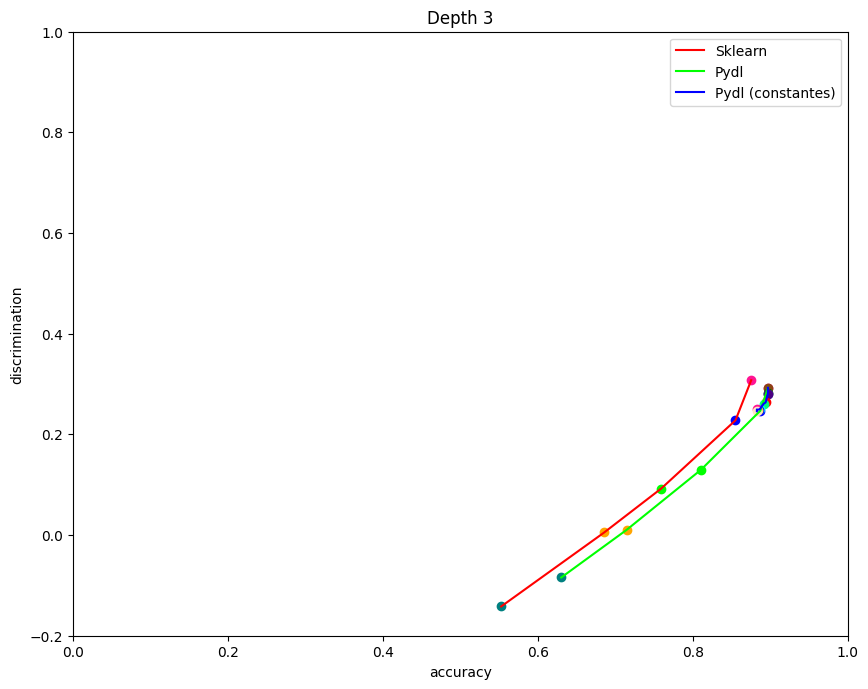

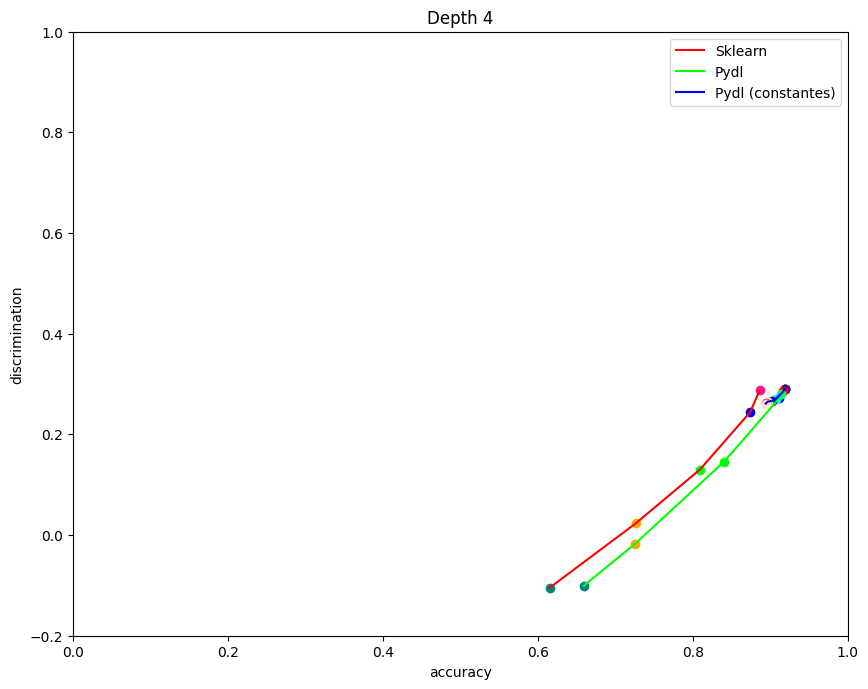

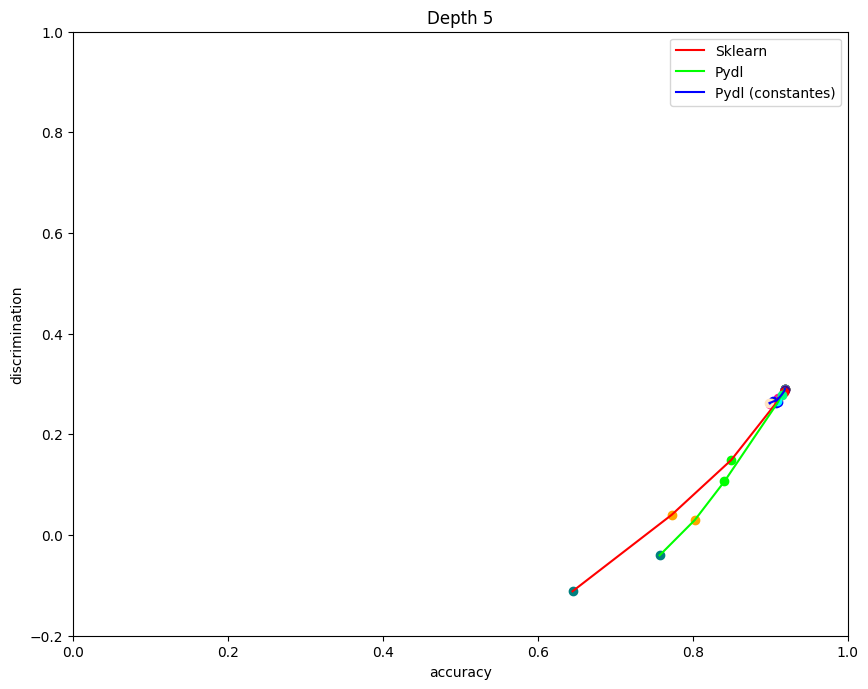

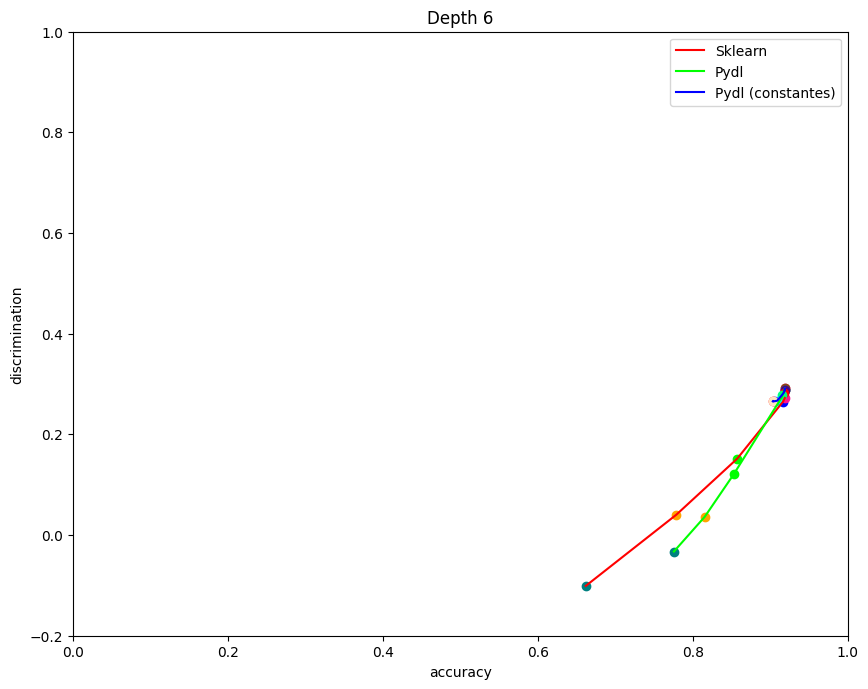

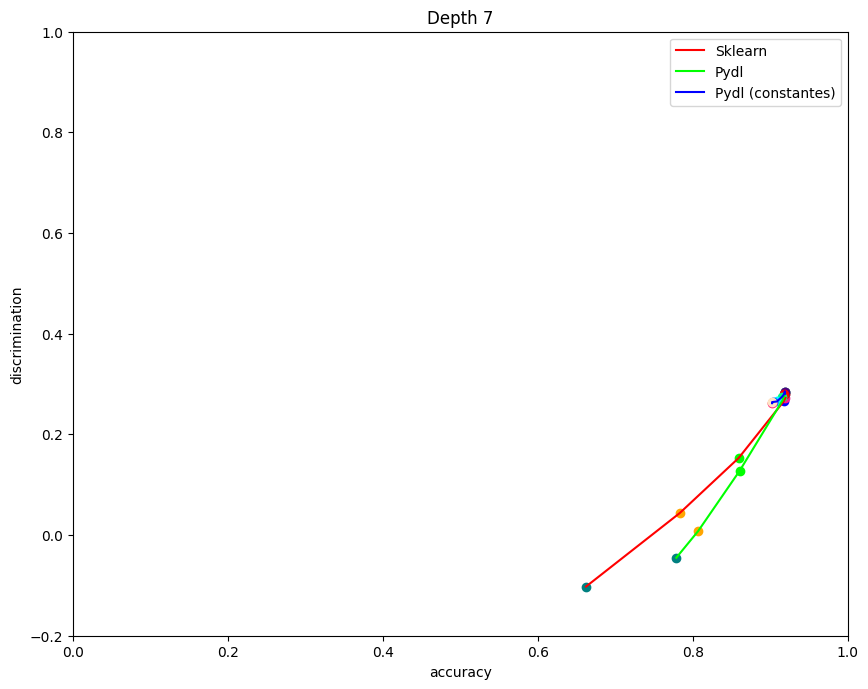

In [63]:
graphh([('accuracy_relab_0.0', 'discrimination_relab_0.0'), ('accuracy_relab_0.1', 'discrimination_relab_0.1'), ('accuracy_relab_0.2', 'discrimination_relab_0.2'), ('accuracy_relab_0.3', 'discrimination_relab_0.3'), ('accuracy_pred', 'discrimination_train_pred')], ("accuracy_pred", "discrimination_train_pred"), (-0.2, 1))

## Train. Threshold Absolute

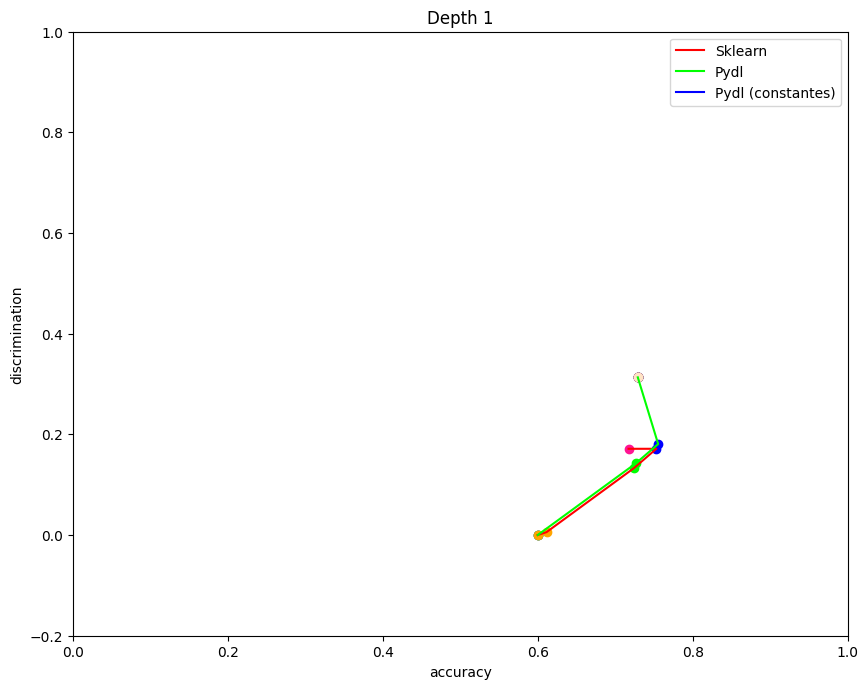

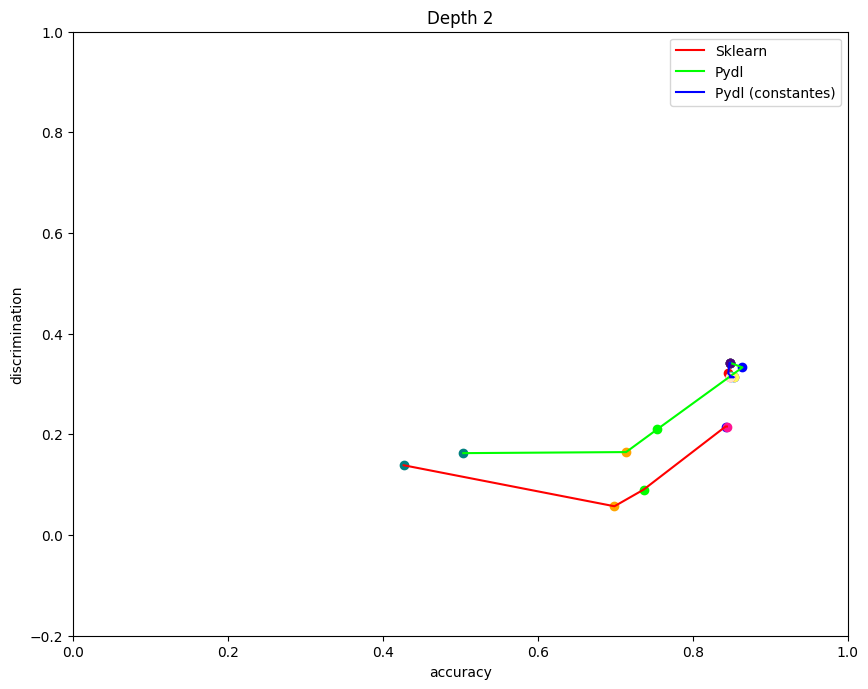

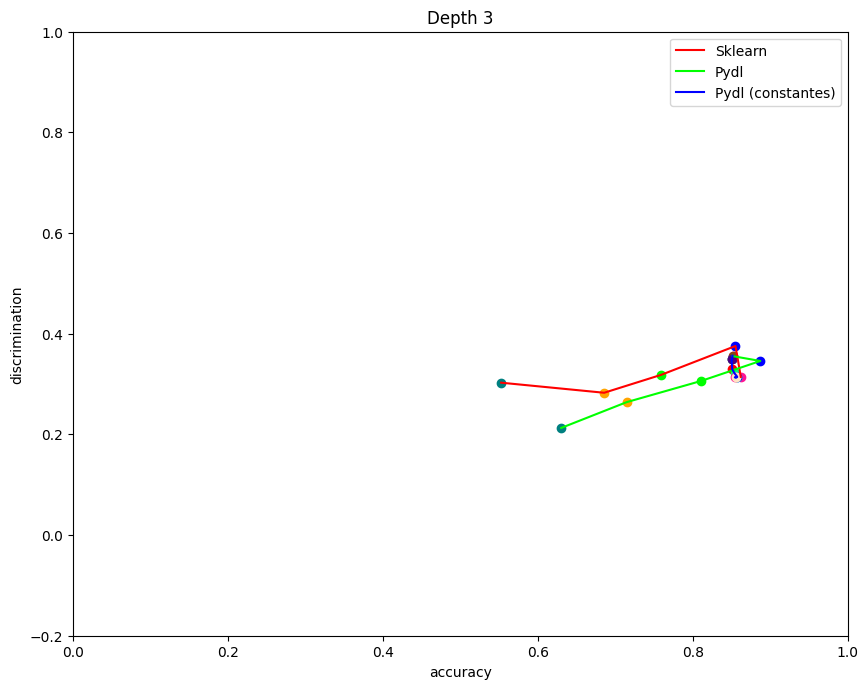

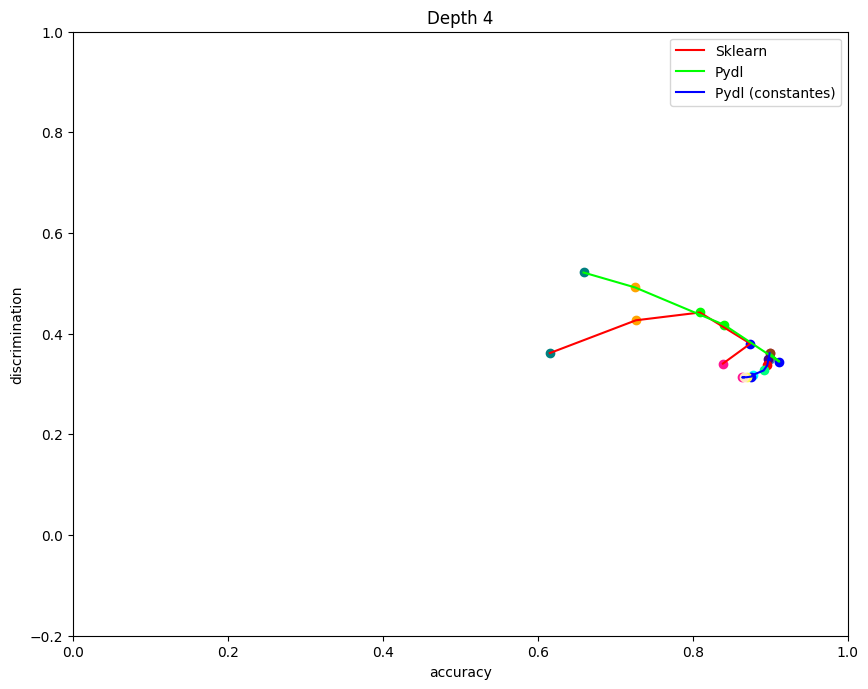

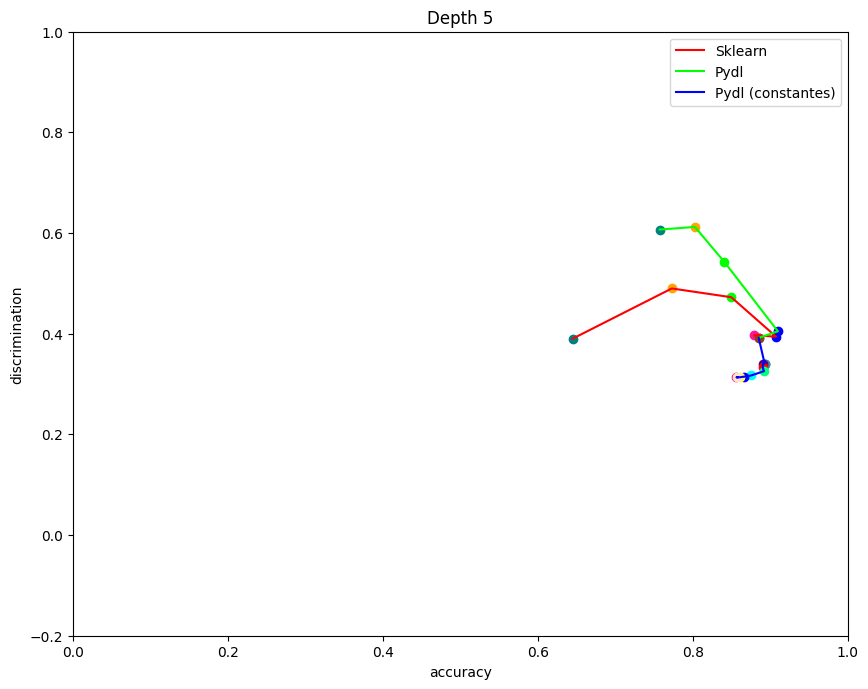

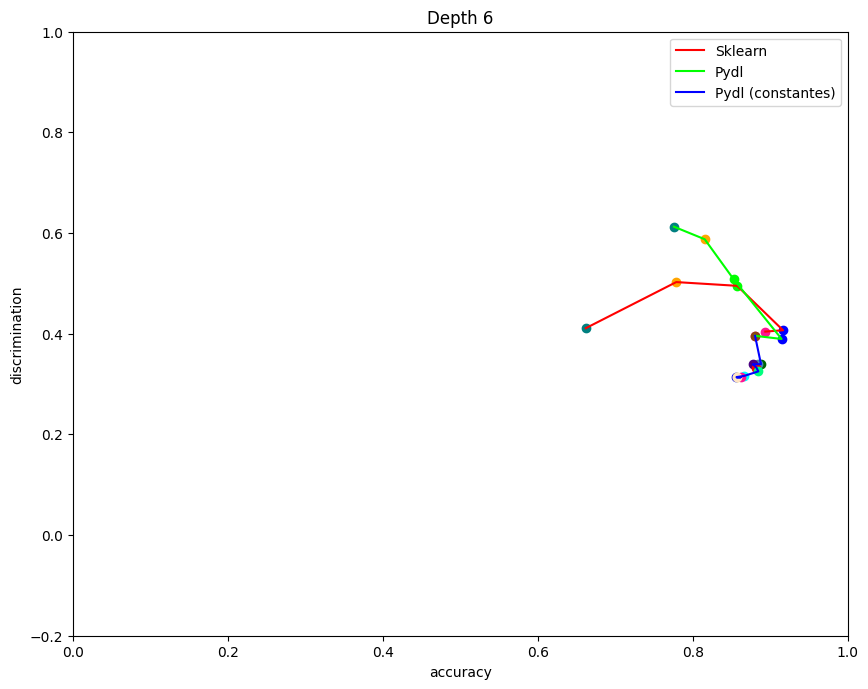

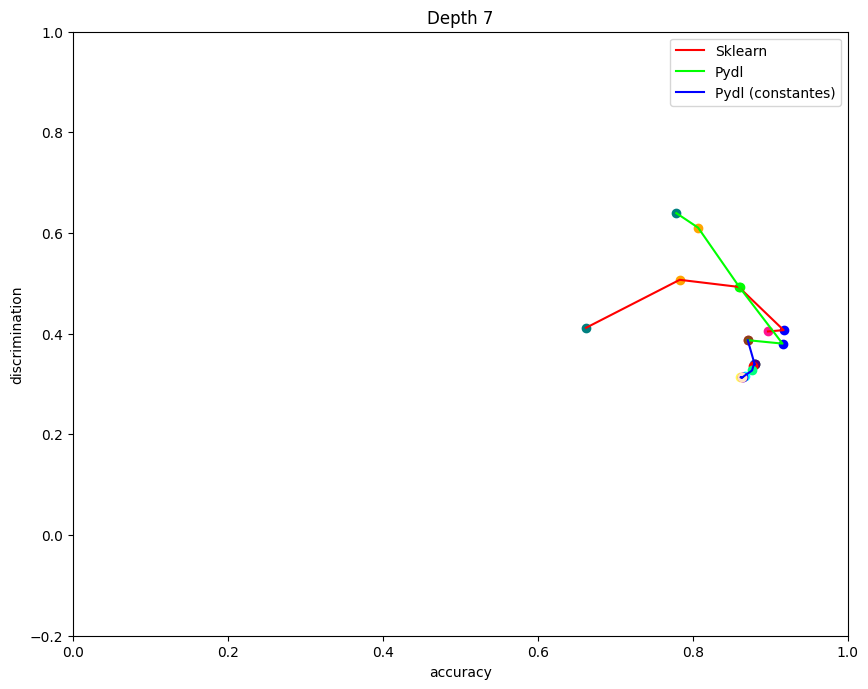

In [64]:
graphh([('accuracy_relab_0.0', 'discrimination_relab_abs_0.0'), ('accuracy_relab_0.1', 'discrimination_relab_abs_0.1'), ('accuracy_relab_0.2', 'discrimination_relab_abs_0.2'), ('accuracy_relab_0.3', 'discrimination_relab_abs_0.3'), ('accuracy_test', 'sum_discrimination_additive_train_pred_abs')], ("accuracy_test", "sum_discrimination_additive_train_pred_abs"), (-0.2, 1))

## Train. Leaf

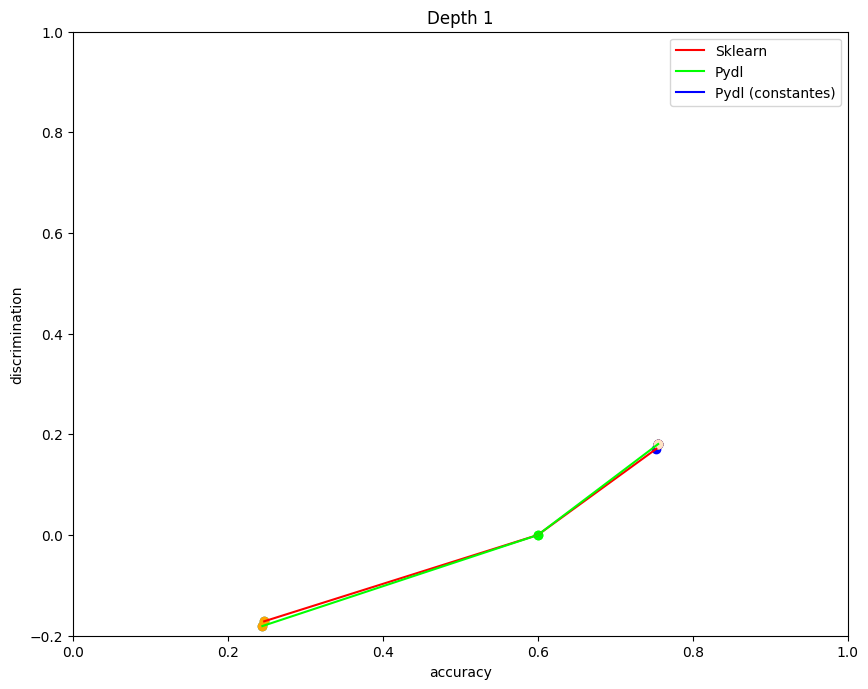

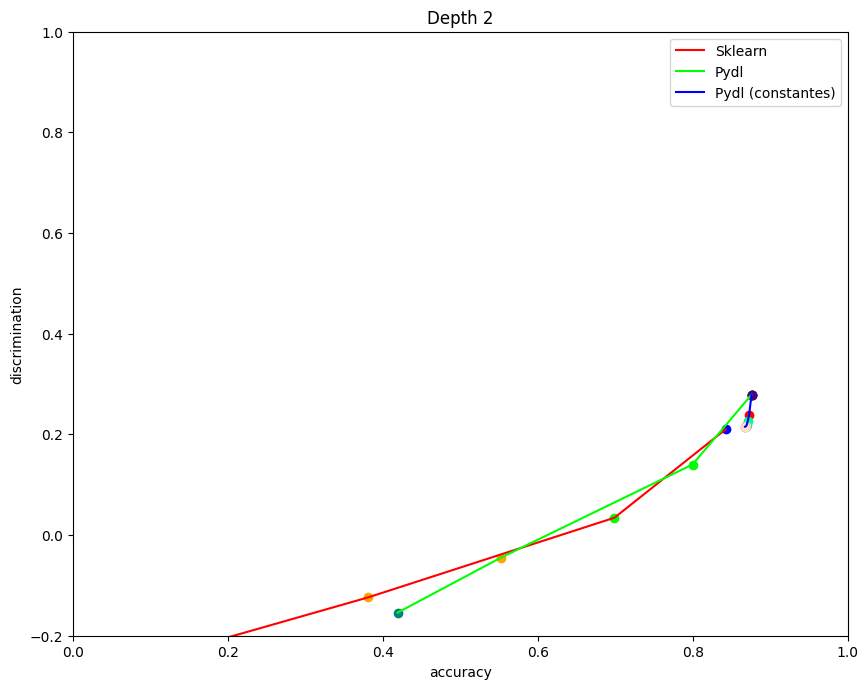

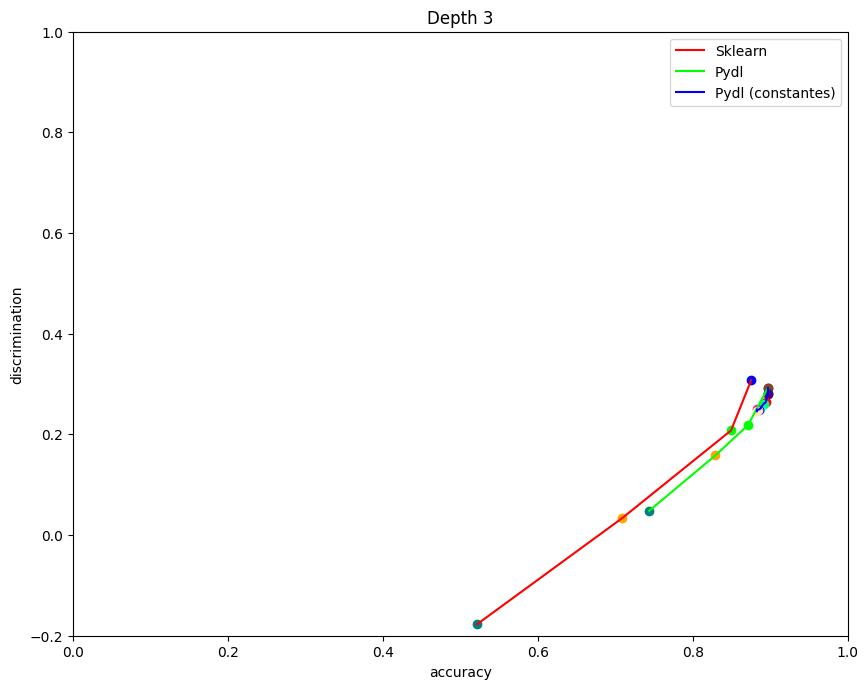

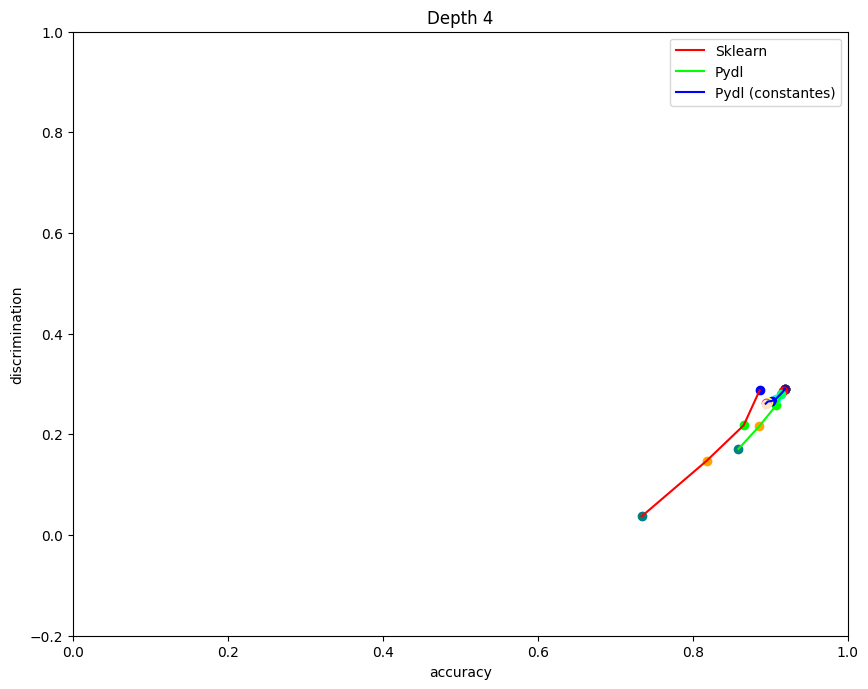

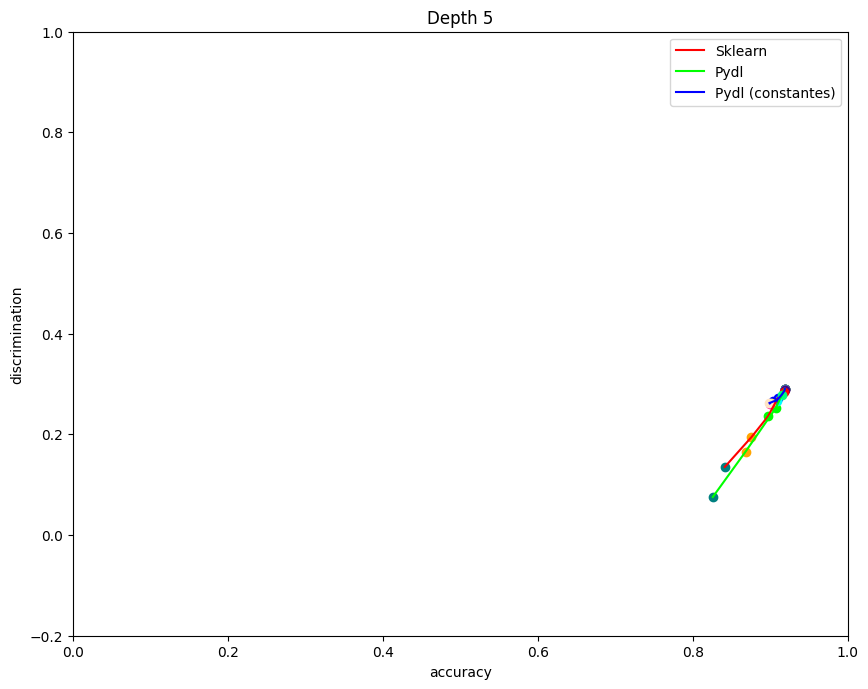

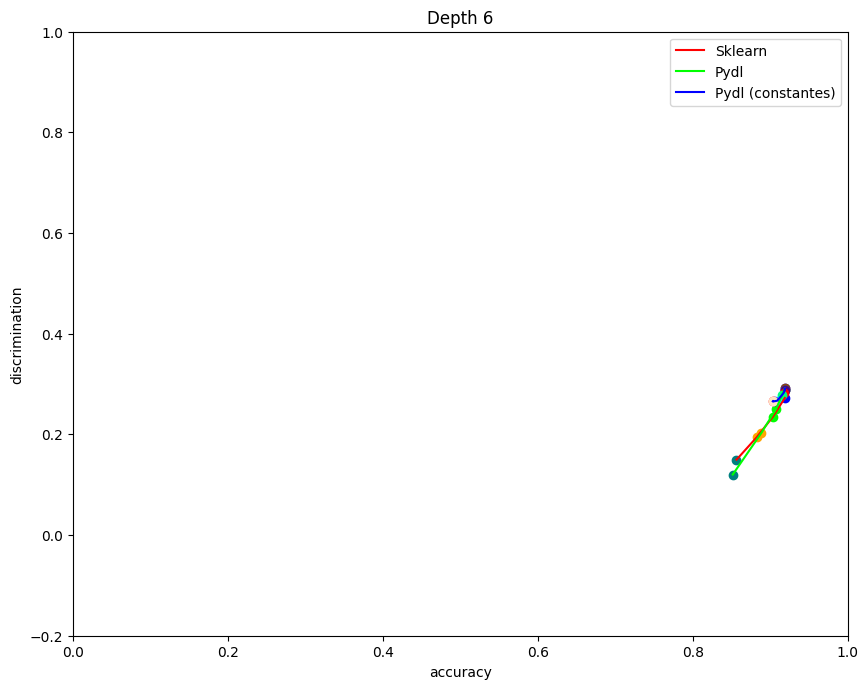

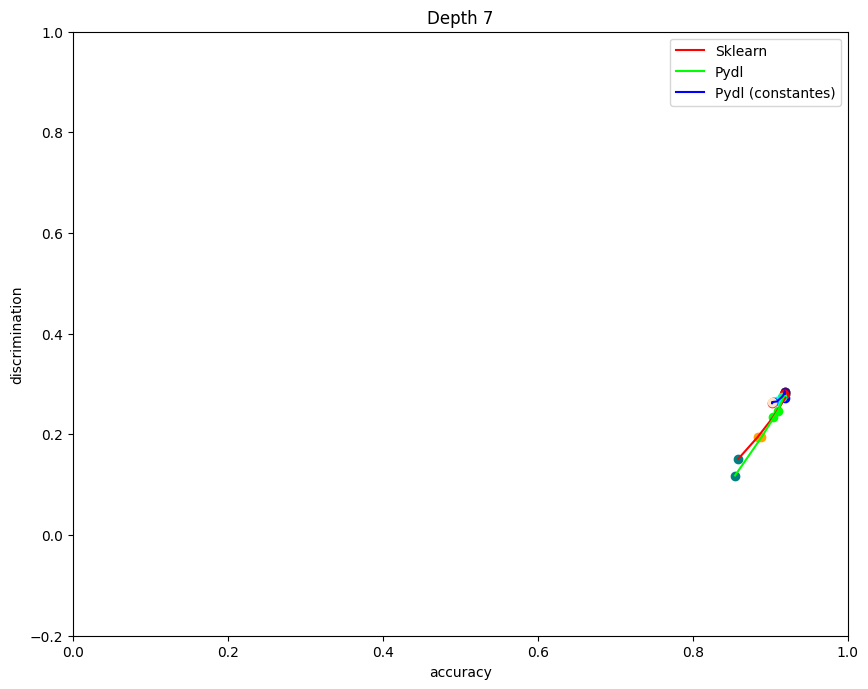

In [65]:
graphh([('accuracy_relab_3', 'discrimination_relab_3'), ('accuracy_relab_2', 'discrimination_relab_2'), ('accuracy_relab_1', 'discrimination_relab_1'),   ('accuracy_pred', 'discrimination_train_pred')], ("accuracy_pred", "discrimination_train_pred"), (-0.2, 1))

## Train. Leaf Absolute

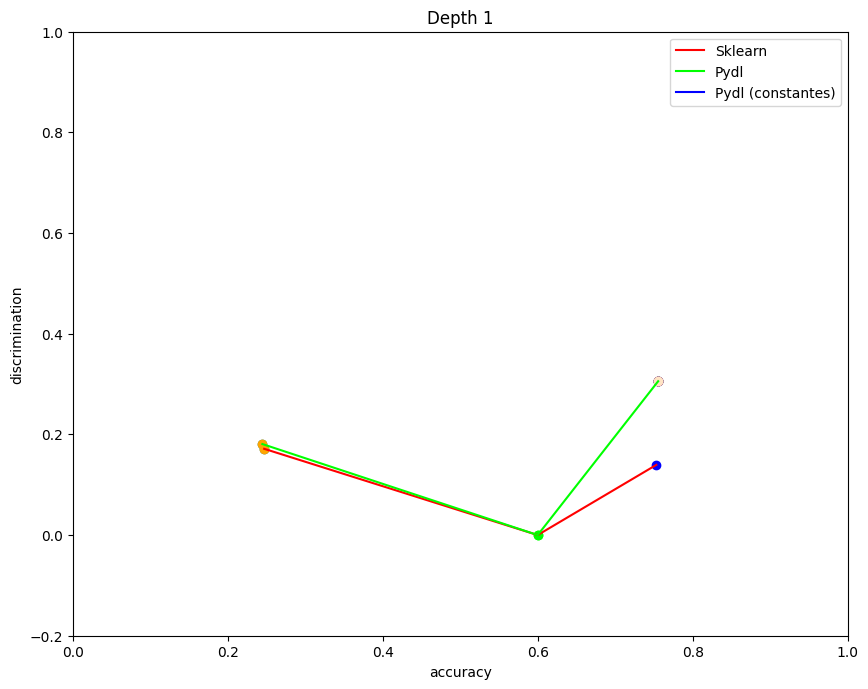

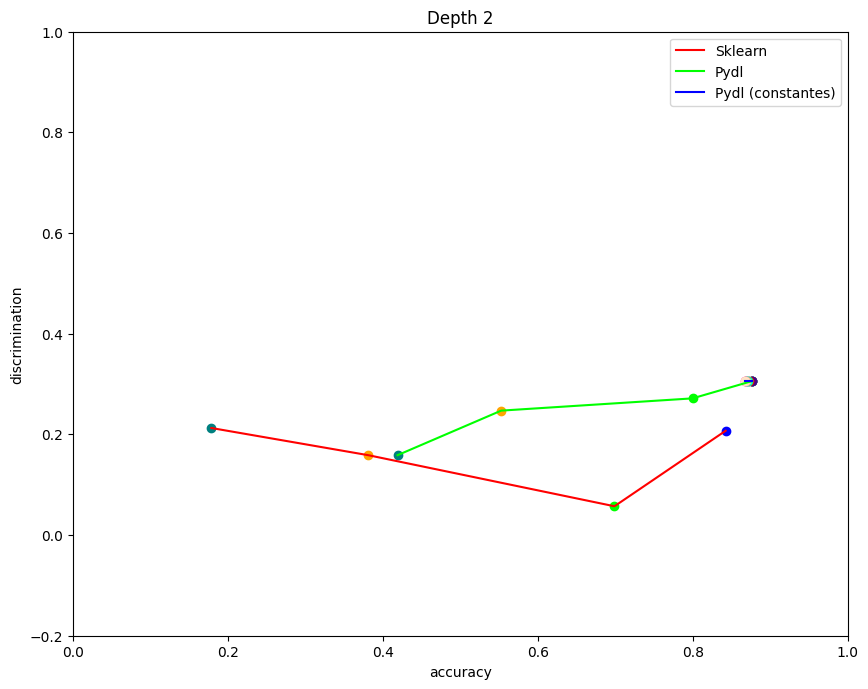

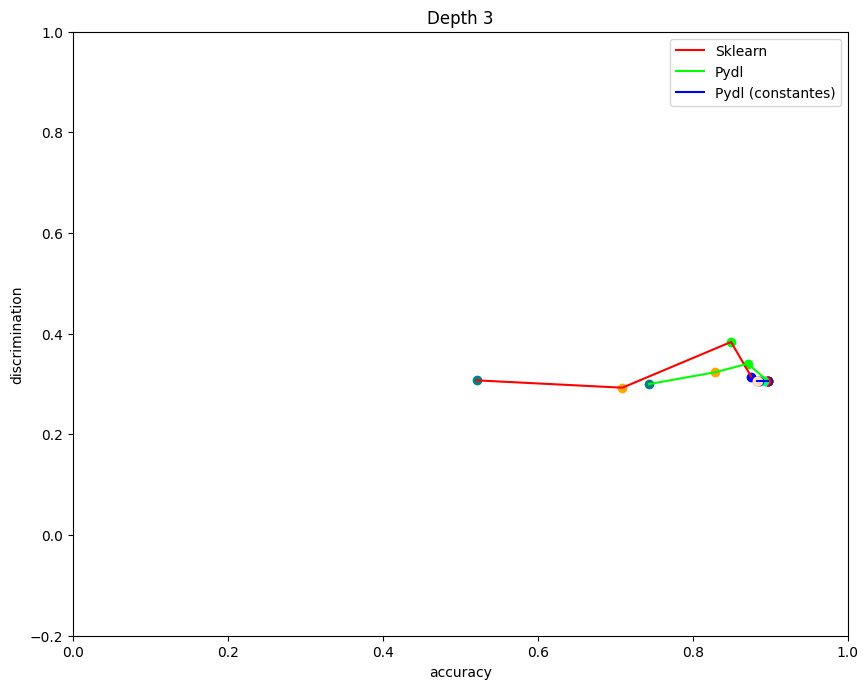

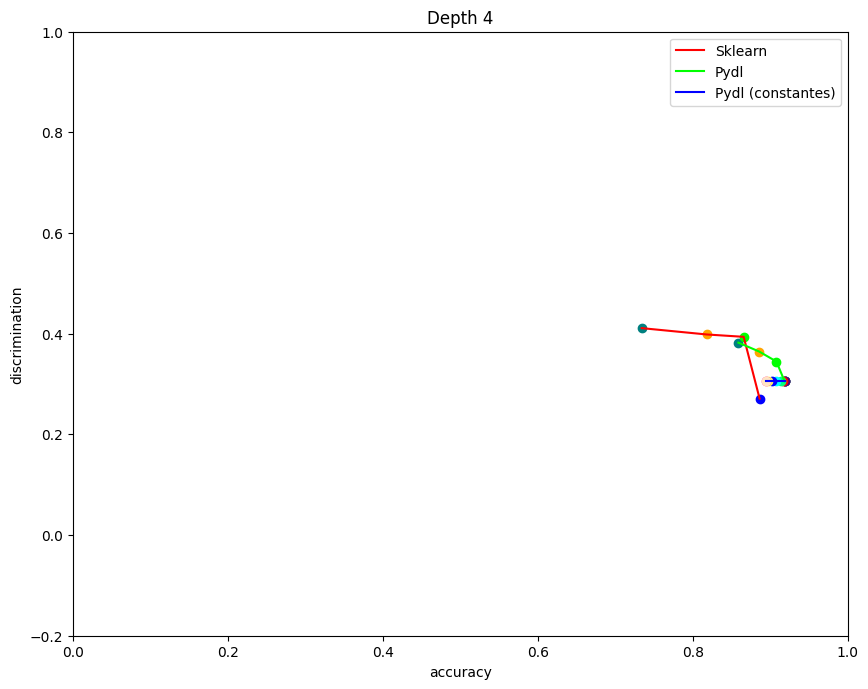

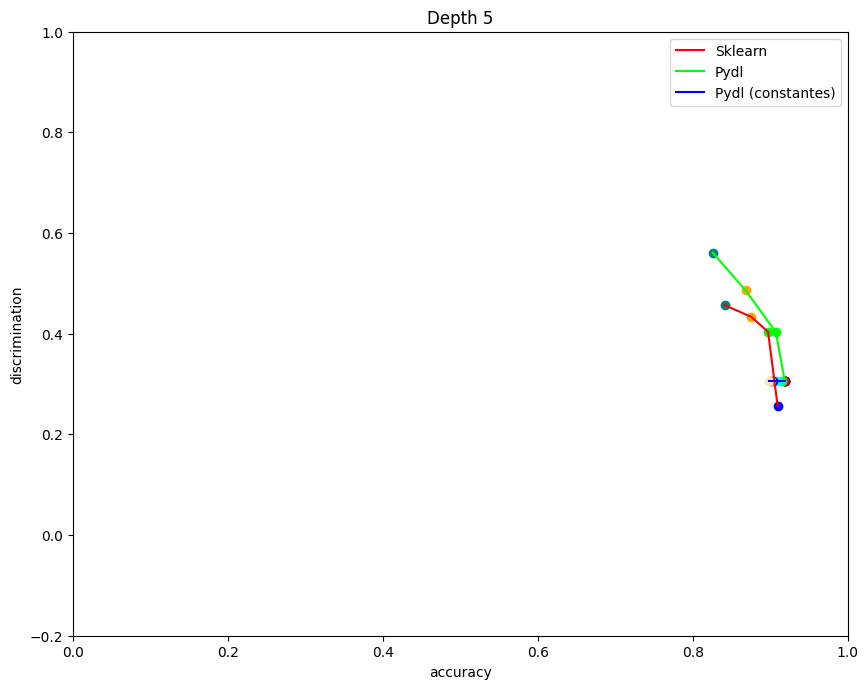

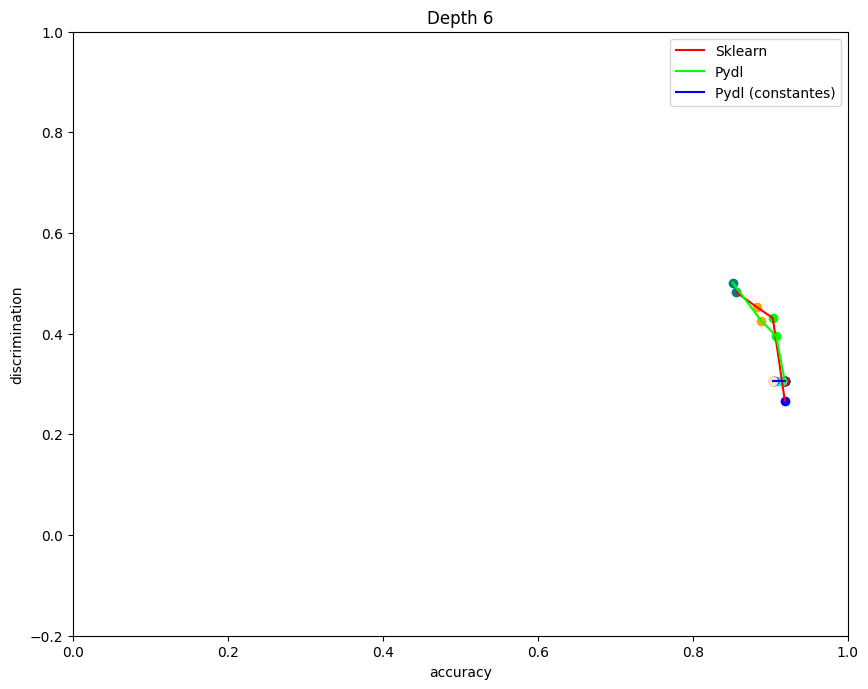

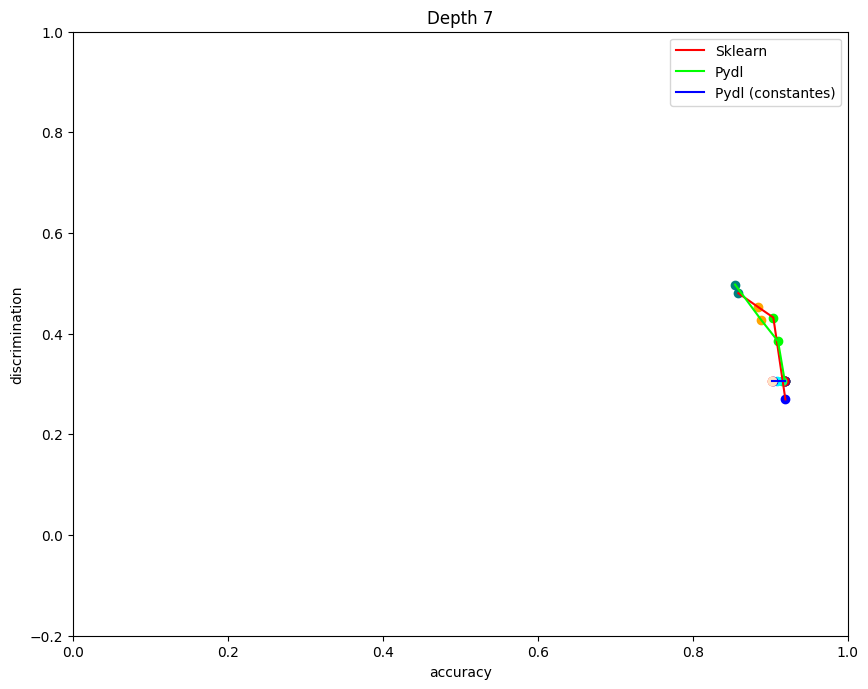

In [66]:
graphh([('accuracy_relab_3', 'discrimination_relab_abs_3'), ('accuracy_relab_2', 'discrimination_relab_abs_2'), ('accuracy_relab_1', 'discrimination_relab_abs_1'),   ('accuracy_pred', 'sum_discrimination_additive_test_pred')], ("accuracy_pred", "sum_discrimination_additive_test_pred"), (-0.2, 1))

# Test

## Test. Threshold

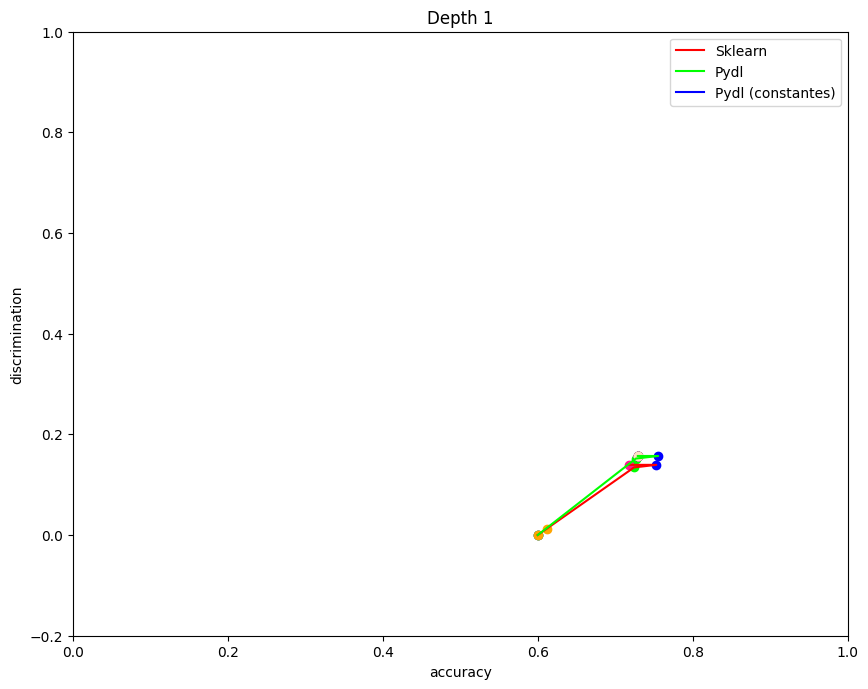

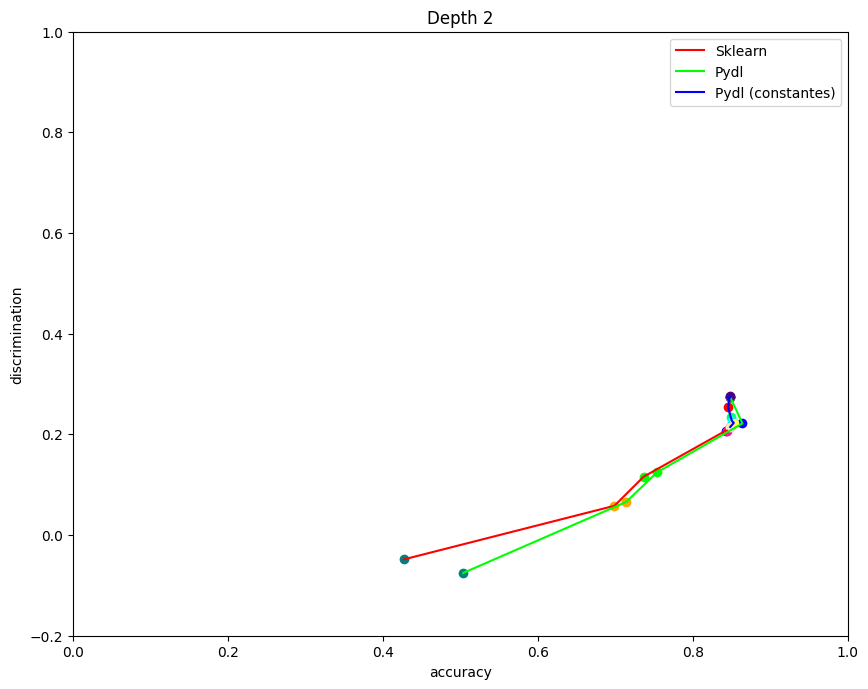

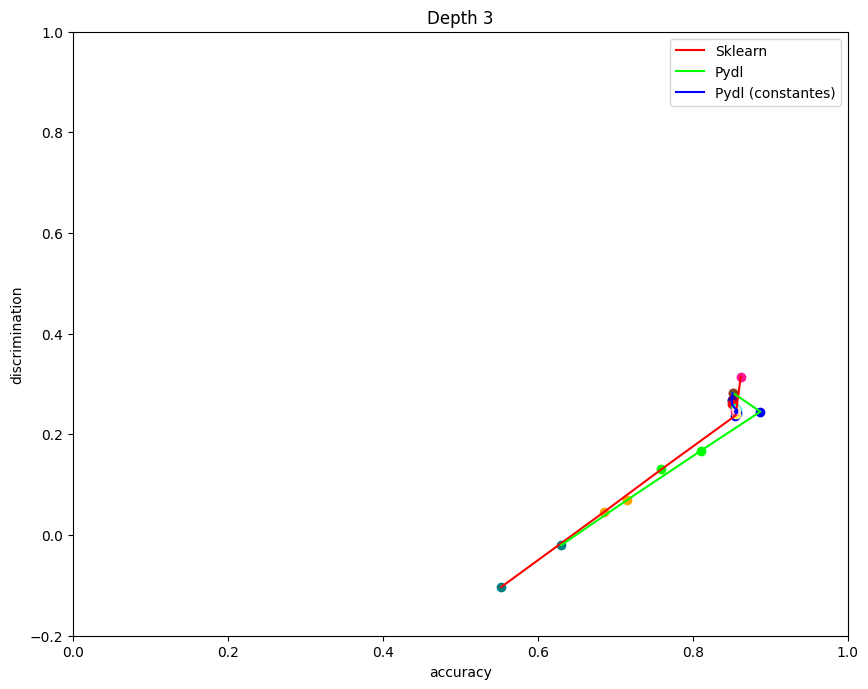

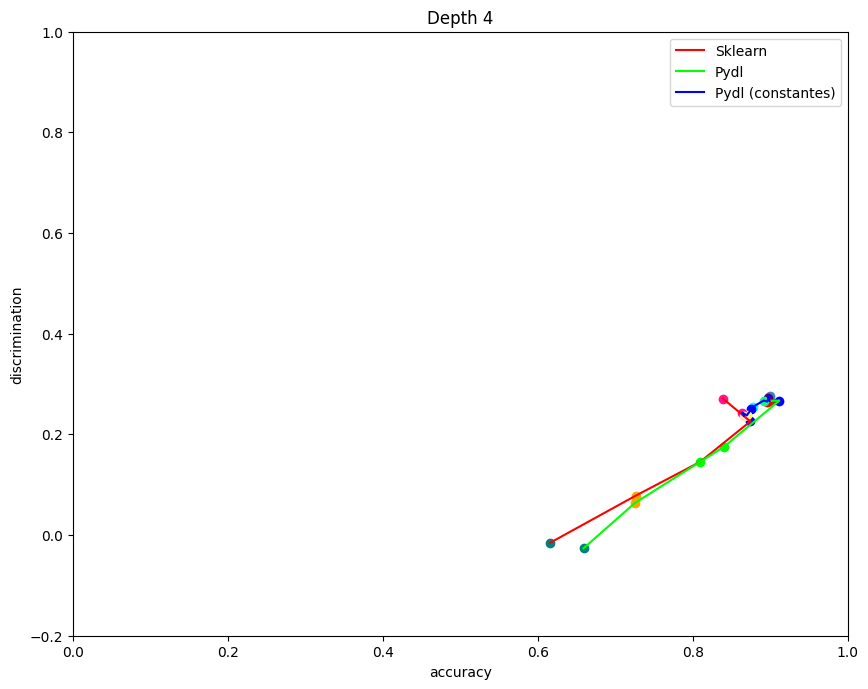

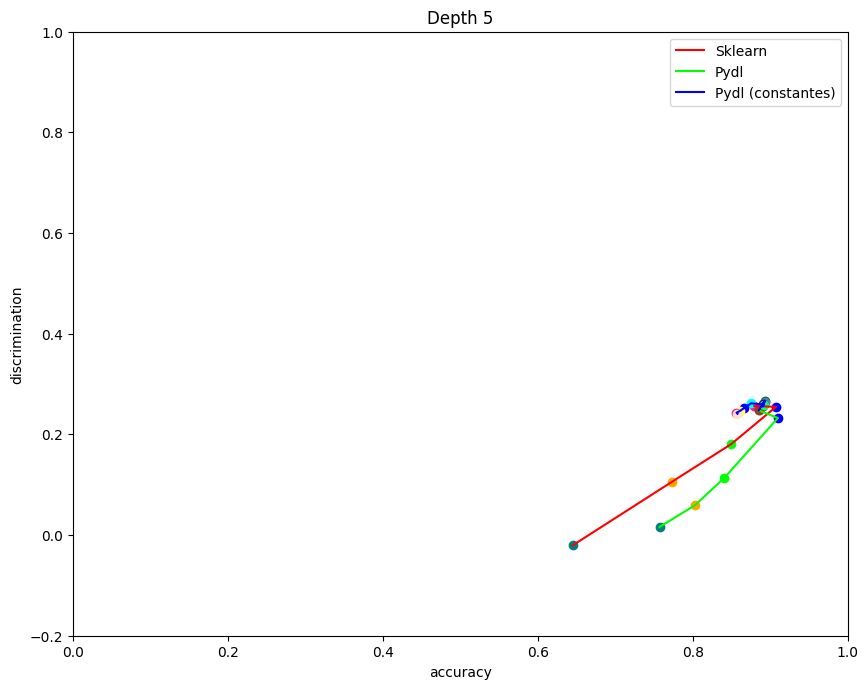

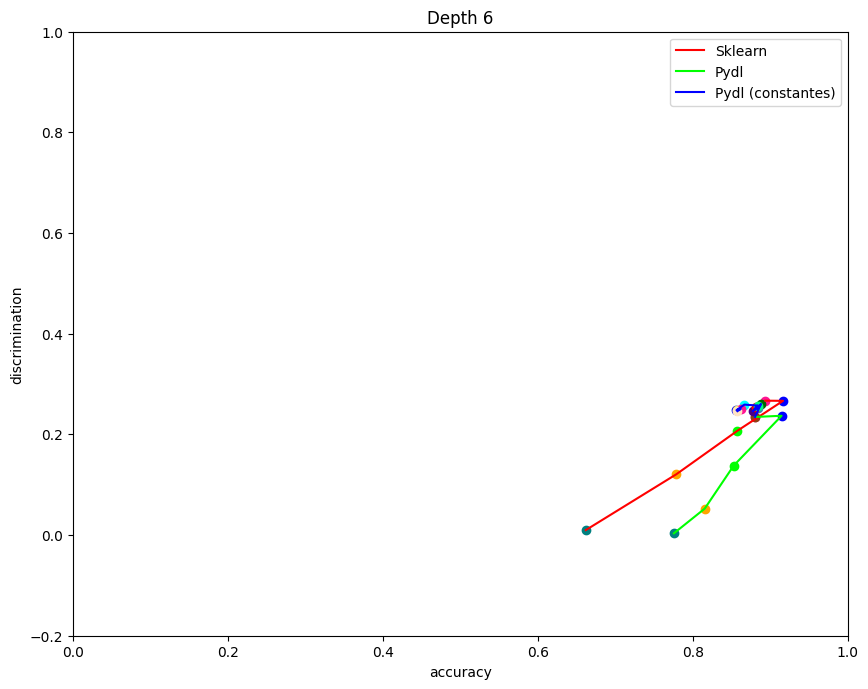

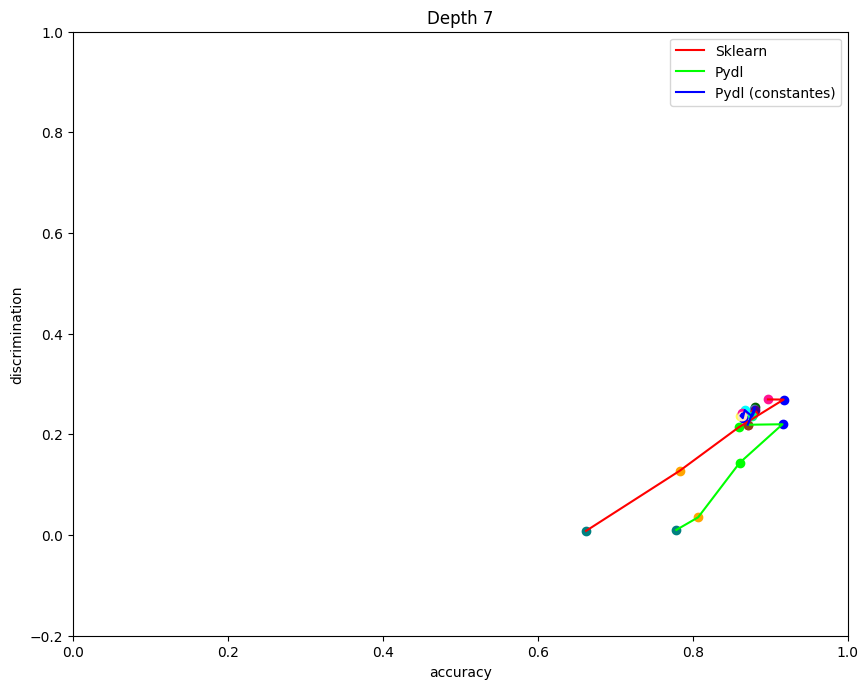

In [67]:
graphh([('accuracy_relab_0.0', 'discrimination_relab_test_0.0'), ('accuracy_relab_0.1', 'discrimination_relab_test_0.1'), ('accuracy_relab_0.2', 'discrimination_relab_test_0.2'), ('accuracy_relab_0.3', 'discrimination_relab_test_0.3'), ('accuracy_test', 'discrimination_test')], ("accuracy_test", "discrimination_test"), (-0.2, 1))


## Test. Threshold Absolute

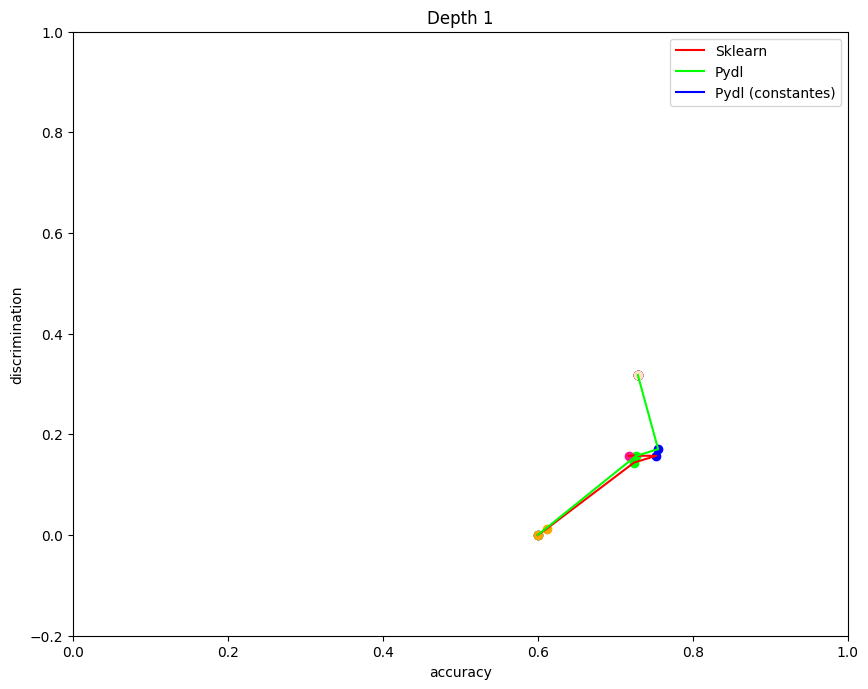

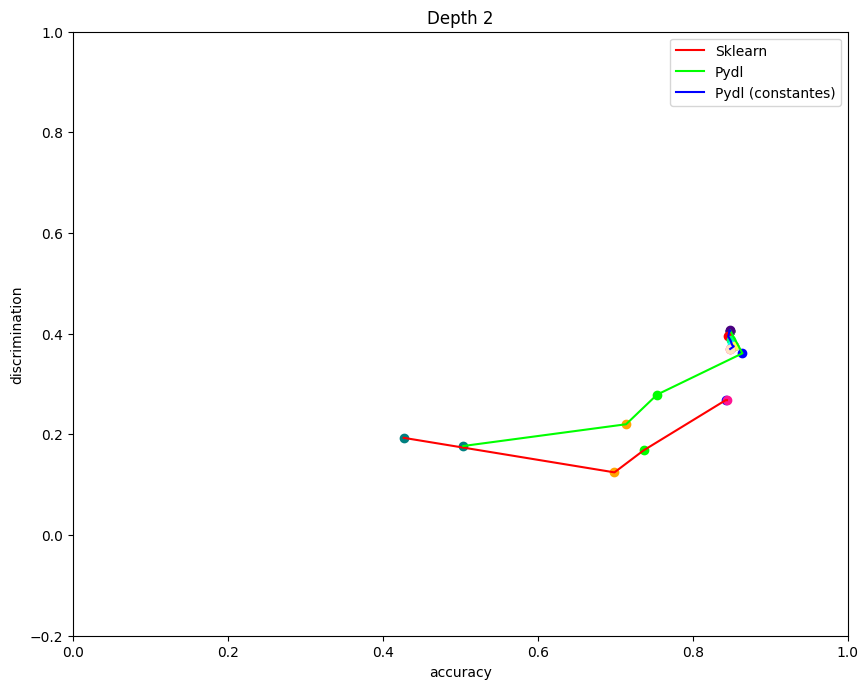

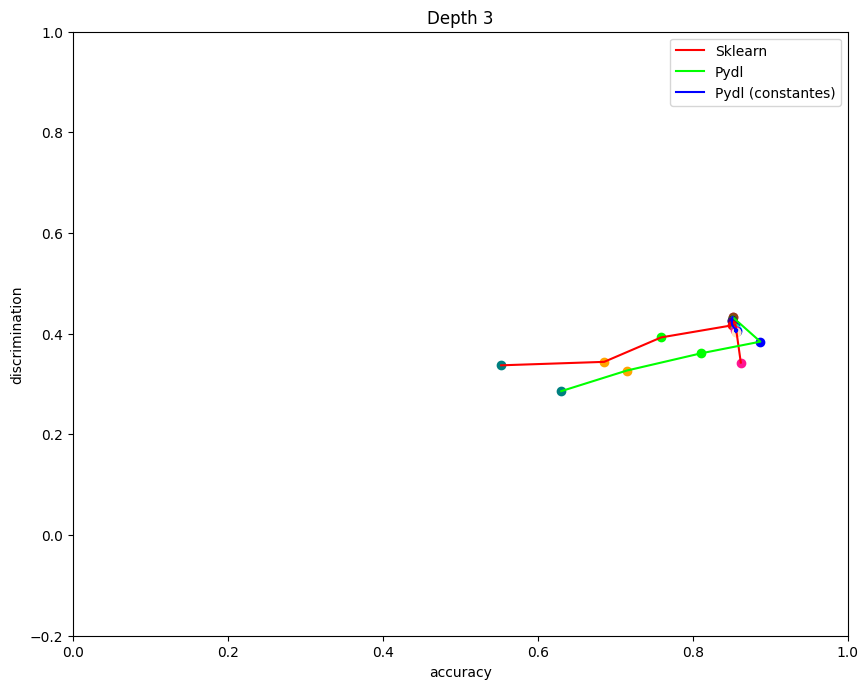

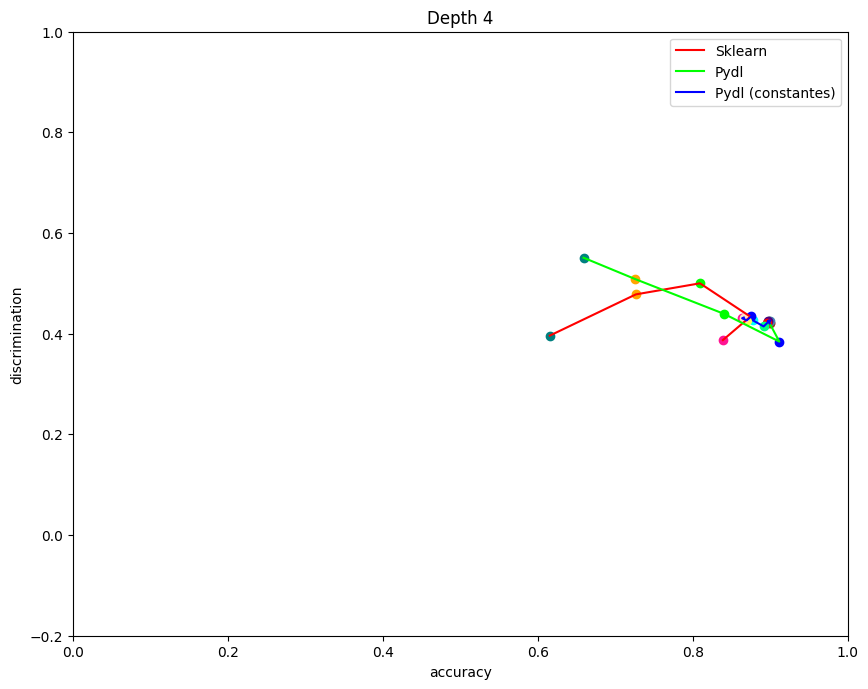

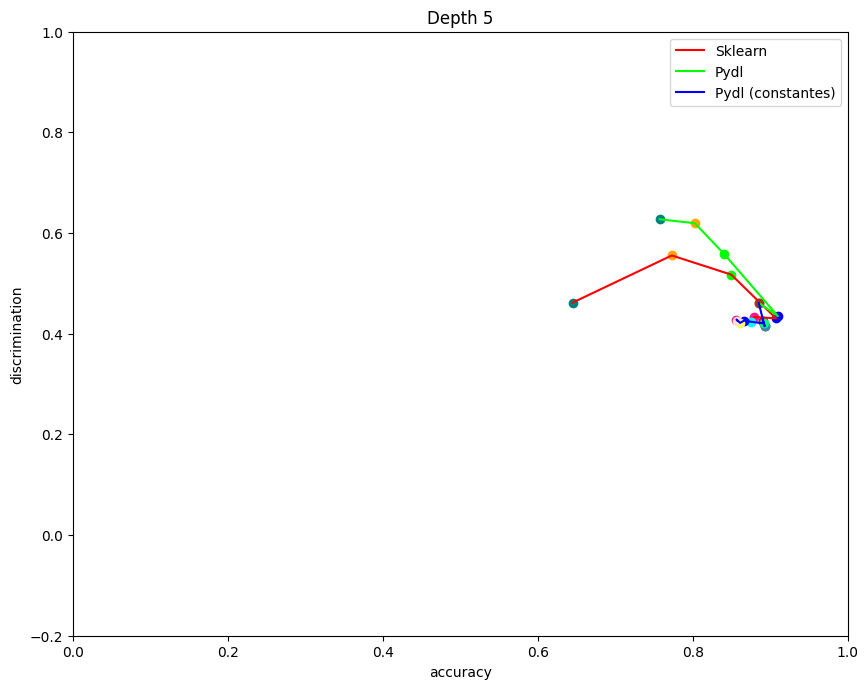

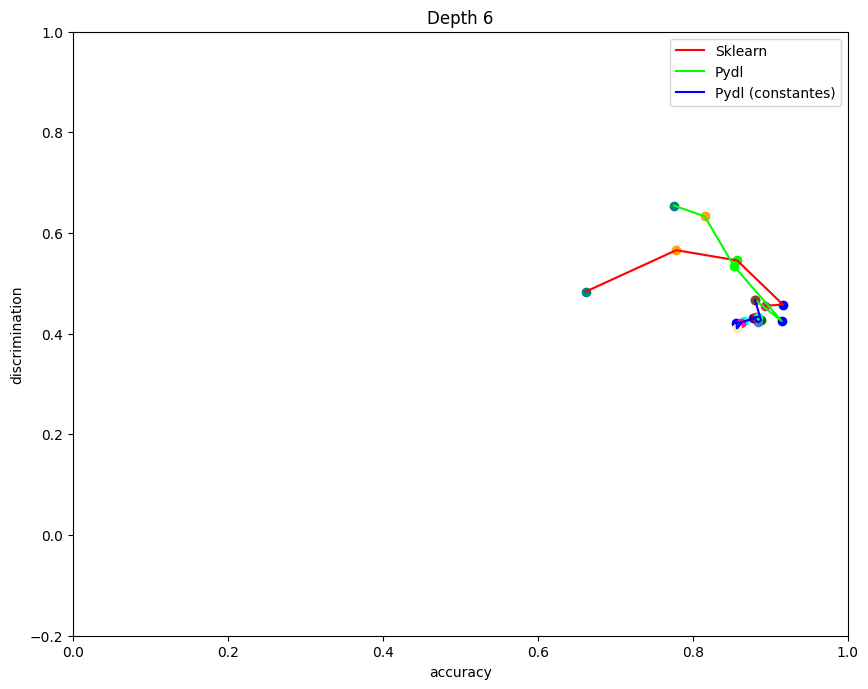

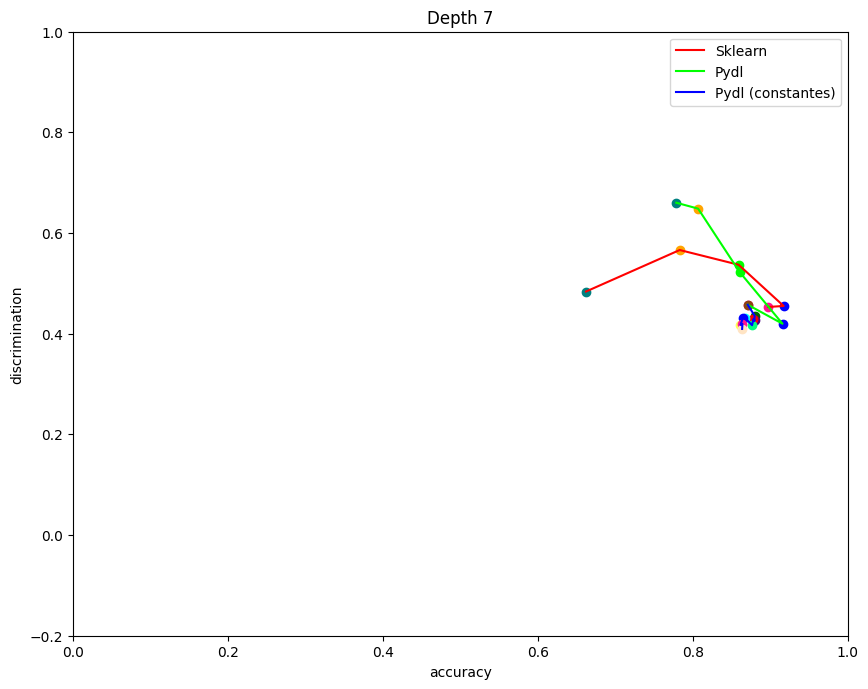

In [68]:
graphh([('accuracy_relab_0.0', 'discrimination_relab_test_abs_0.0'), ('accuracy_relab_0.1', 'discrimination_relab_test_abs_0.1'), ('accuracy_relab_0.2', 'discrimination_relab_test_abs_0.2'), ('accuracy_relab_0.3', 'discrimination_relab_test_abs_0.3'), ('accuracy_test', 'sum_discrimination_additive_test_pred_abs')], ("accuracy_test", "sum_discrimination_additive_test_pred_abs"), (-0.2, 1))

## Test. Leaf

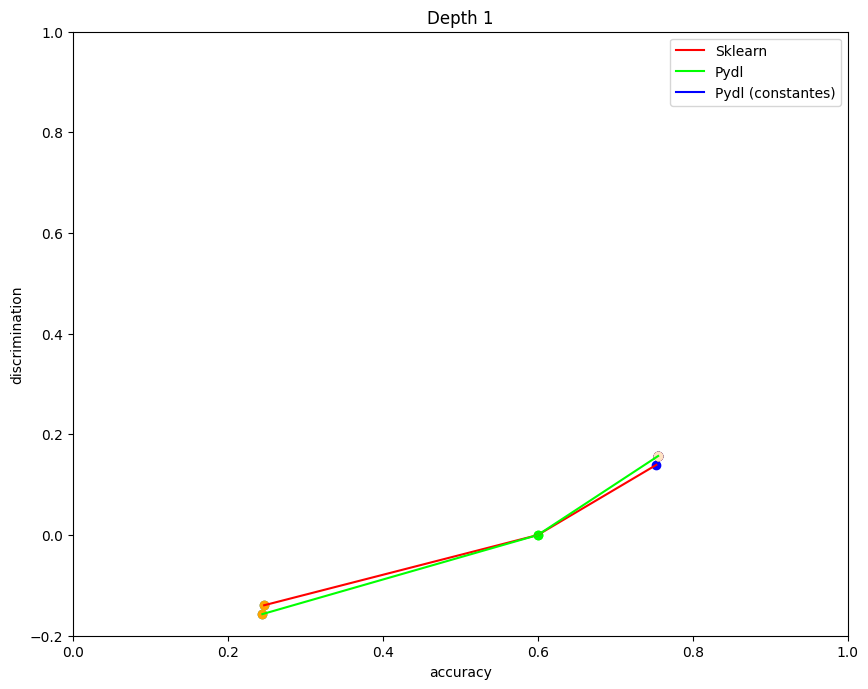

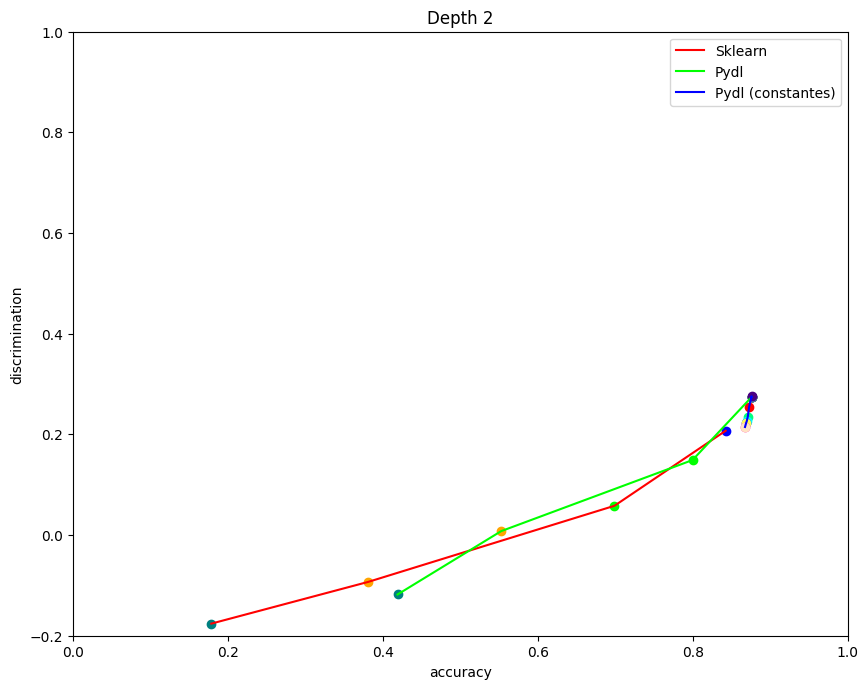

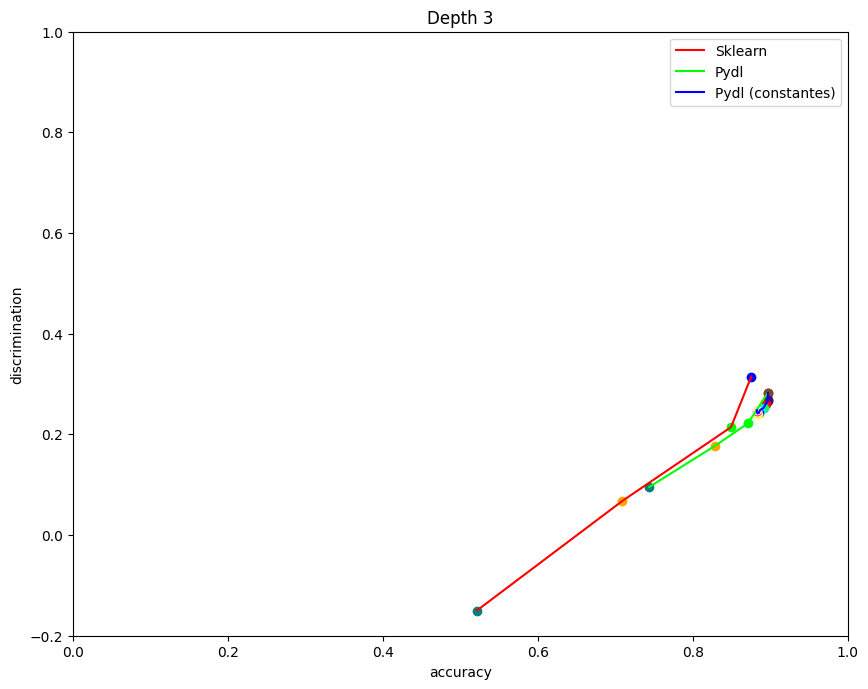

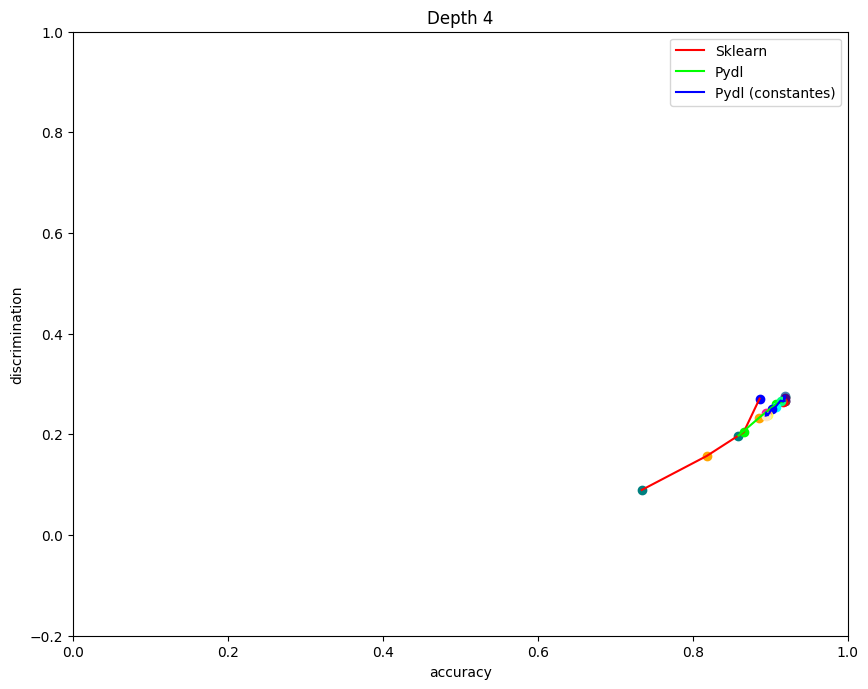

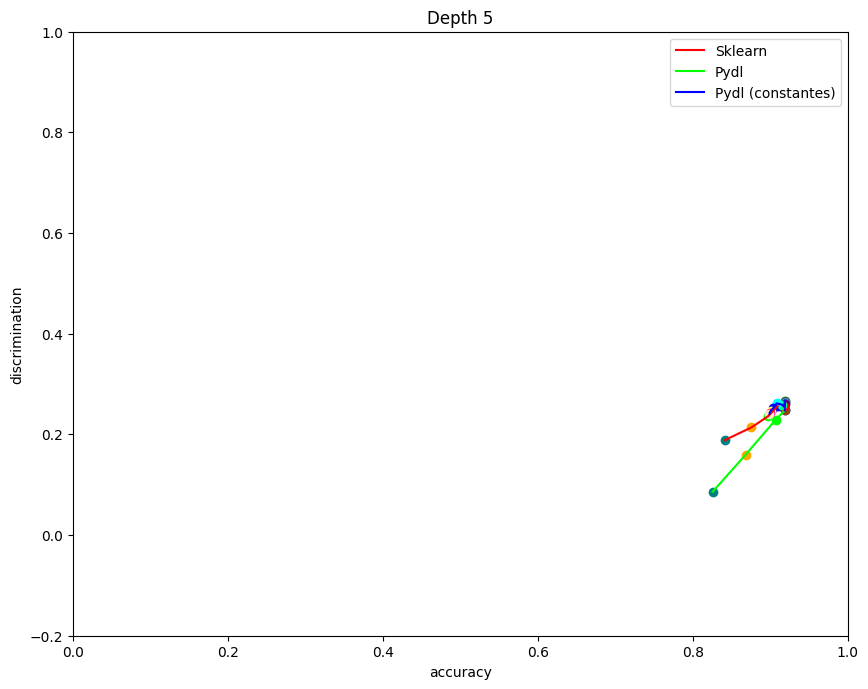

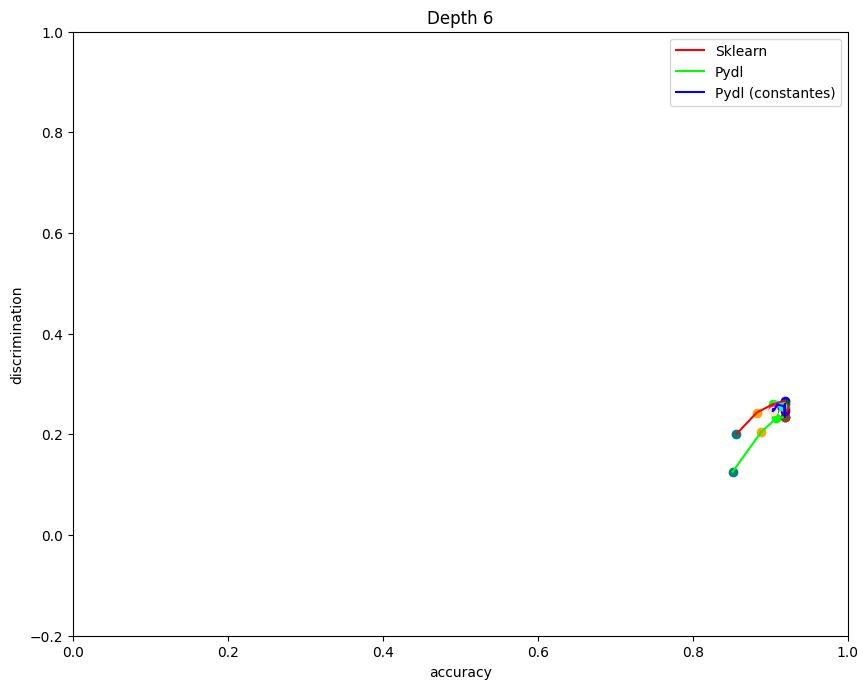

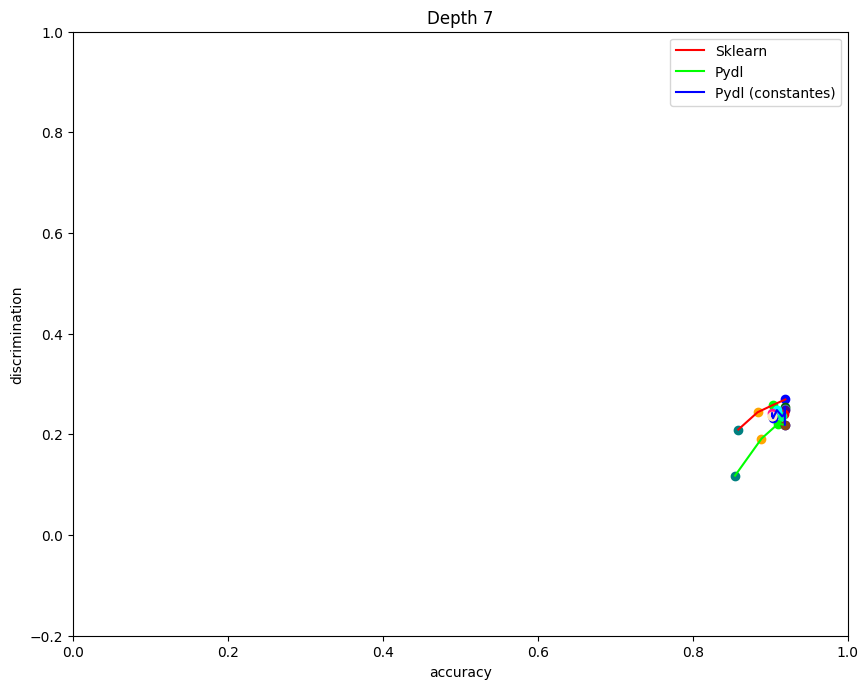

In [69]:
graphh([('accuracy_relab_3', 'discrimination_relab_test_3'), ('accuracy_relab_2', 'discrimination_relab_test_2'), ('accuracy_relab_1', 'discrimination_relab_test_1'),   ('accuracy_pred', 'discrimination_test')], ("accuracy_pred", "discrimination_test"), (-0.2, 1))

## Test. Leaf Absolute

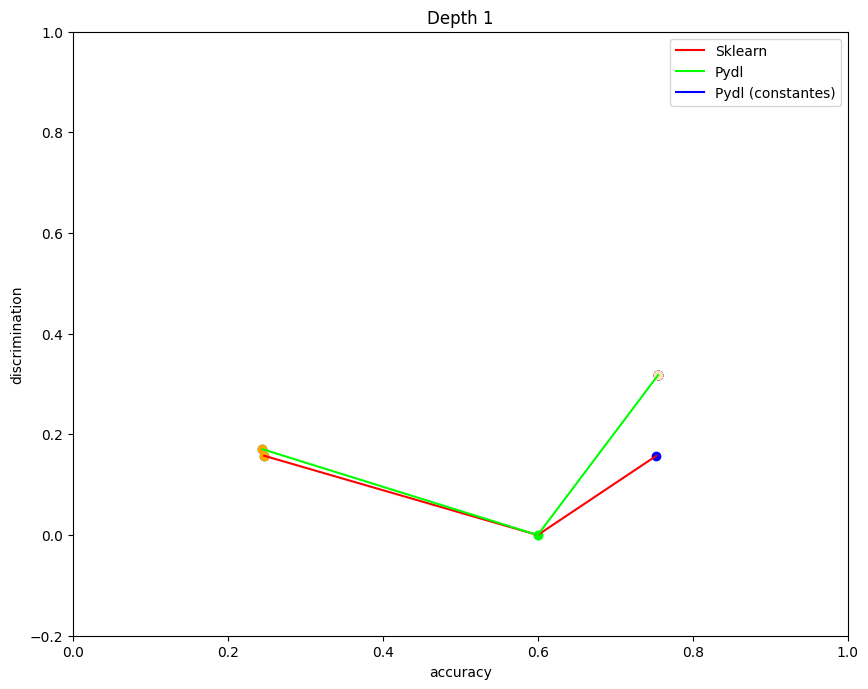

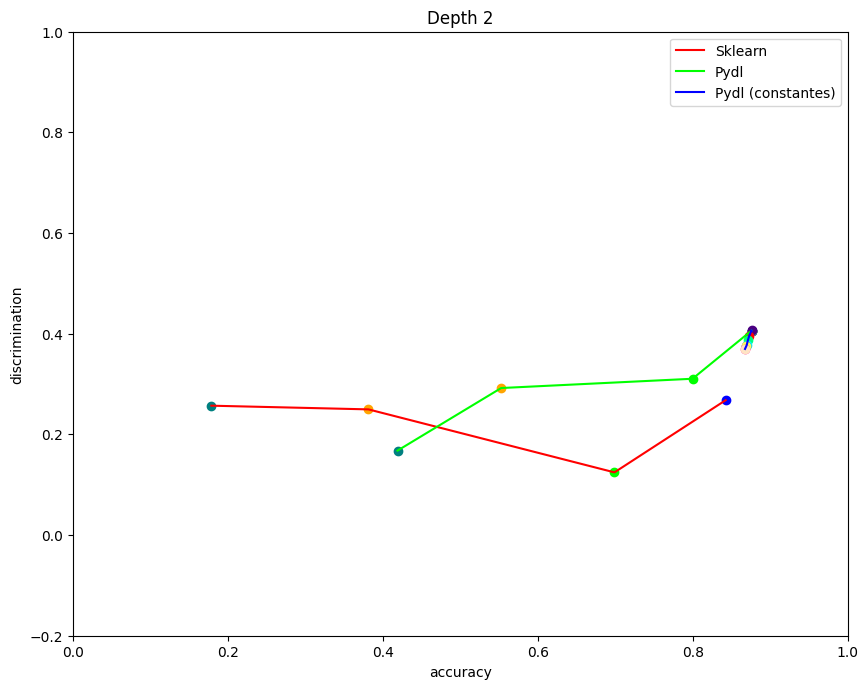

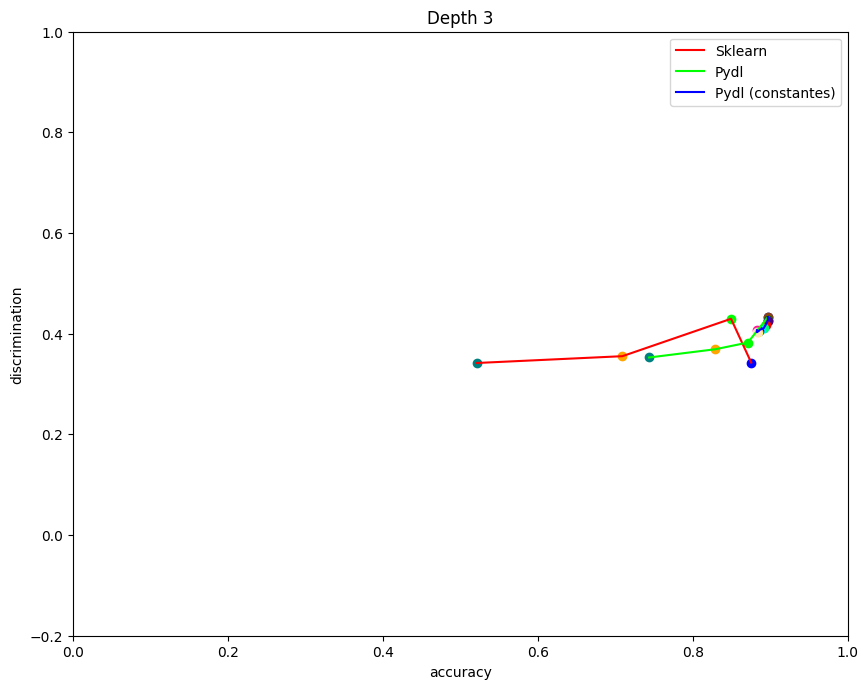

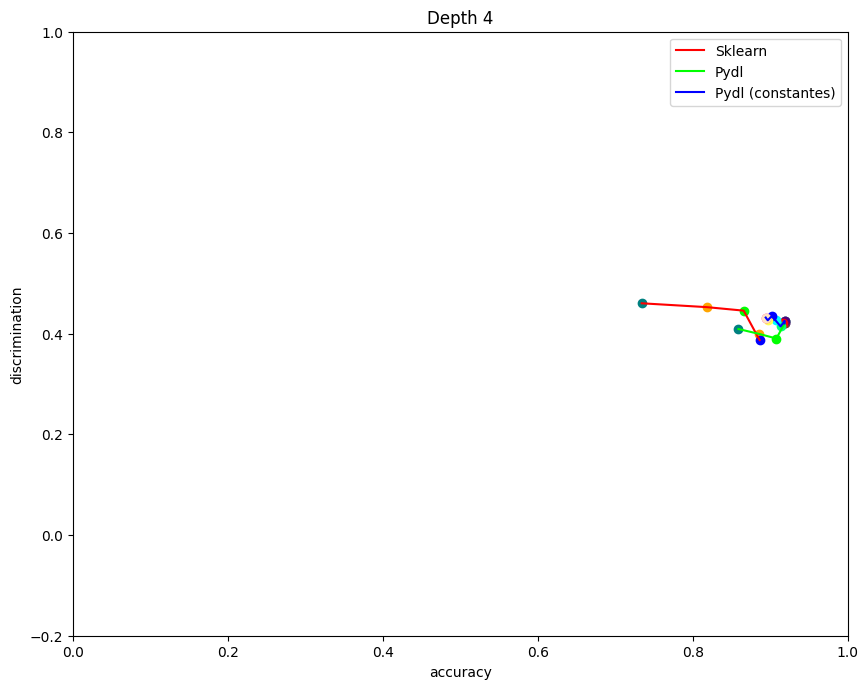

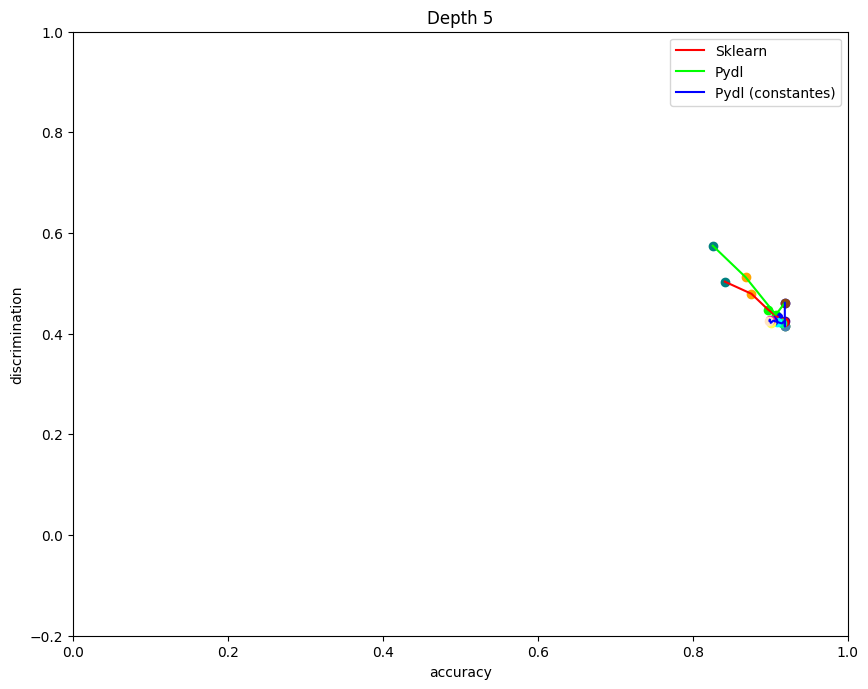

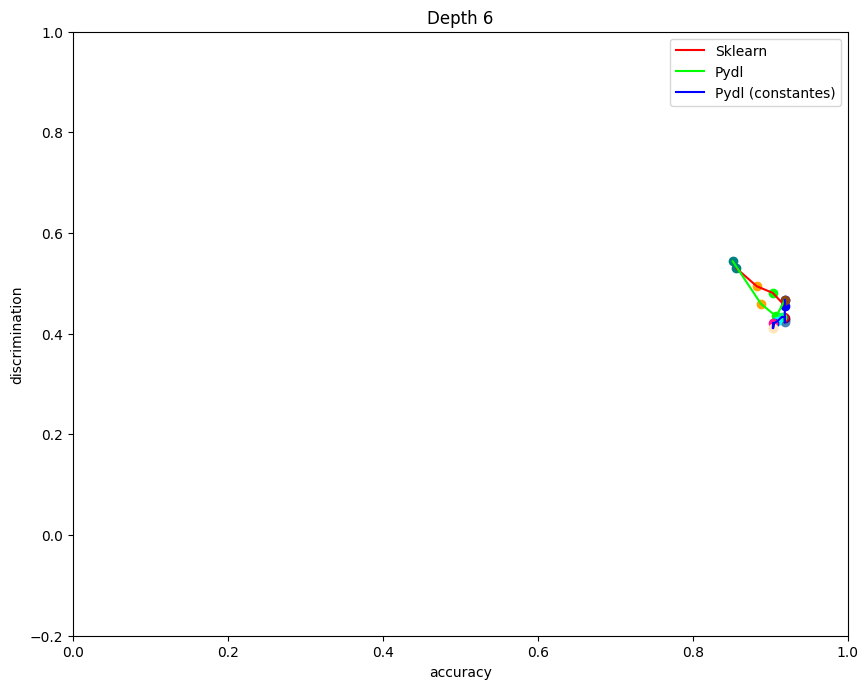

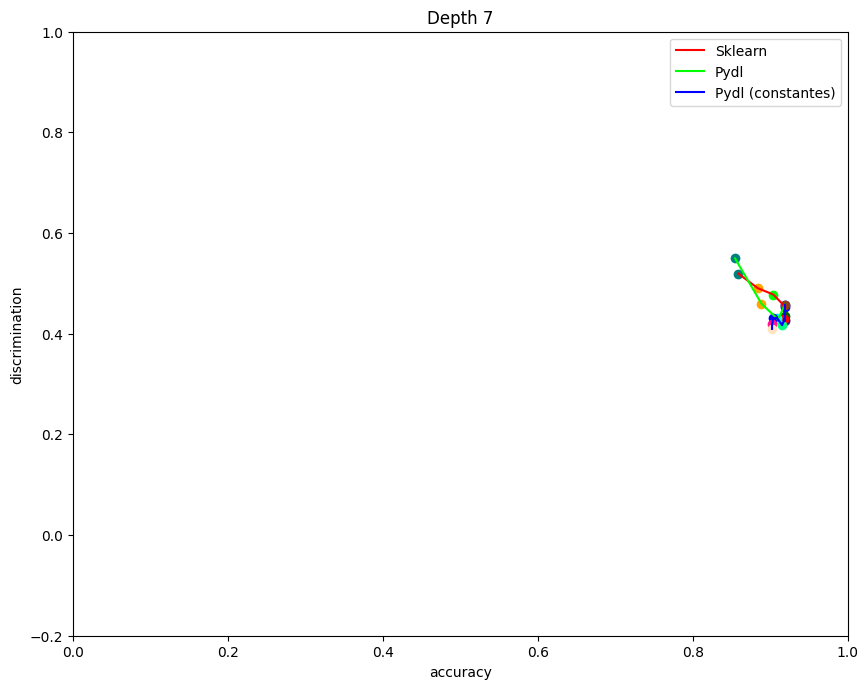

In [70]:
graphh([('accuracy_relab_3', 'discrimination_relab_test_abs_3'), ('accuracy_relab_2', 'discrimination_relab_test_abs_2'), ('accuracy_relab_1', 'discrimination_relab_test_abs_1'),   ('accuracy_pred', 'sum_discrimination_additive_test_pred_abs')], ("accuracy_pred", "sum_discrimination_additive_test_pred_abs"), (-0.2, 1))